In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp

pd.set_option("display.max_columns", None)

In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
# DF1 = Total and facet scores, and score per question
df1 = pd.read_excel('Survey Data.xlsx', sheet_name = 'Risk Facet scores')
df1

responseid  q8_2_1  q8_2_2  q8_2_3  q8_2_4  q8_2_5  q8_3  q8_4  \
0          6873       1       1       1       1       2     2     4   
1         14129       2       2       2       1       2     4     3   
2          5861       1       1       1       2       2     4     4   
3         13364       2       1       2       1       1     4     1   
4         14112       2       2       2       2       2     2     3   
..          ...     ...     ...     ...     ...     ...   ...   ...   
647       14135       1       1       2       1       2     4     3   
648       14155       2       2       2       2       2     4     4   
649       14274       1       1       1       2       2     3     4   
650       14448       2       2       2       2       2     2     2   
651       15717       1       2       1       1       2     4     4   

     q8_5berlin_1  q8_5london_1  q8_5paris_1  q8_6  q8_7  q9_1_1  q9_2_1  \
0               1             1            2     2     4      25      10   
1               1             1            1     1     2      20      10   
2               2             1            1     2     2      25       4   
3               2             1            1     3     2      35      95   
4               2             1            1     3     2      25      20   
..            ...           ...          ...   ...   ...     ...     ...   
647             2             1            1     1     4      25      20   
648             2             1            1     2     4      25       3   
649             2             1            1     3     4      25      20   
650             2             1            2     3     3      20      20   
651             2             1            1     3     2      25      20   

     q9_3  q10_1_1  q10_2_1 q10_3_1  q10_4  Certainty score_5  \
0       4      500      100      73      2                  1   
1       3      500       10       1      3                  4   
2       2      500      100      10      3                  2   
3       1      650      700      75      3                  2   
4       4      500       10     0.1      2                  5   
..    ...      ...      ...     ...    ...                ...   
647     3      500       10     0.1      3                  2   
648     4      500       10     0.1      3                  5   
649     3      500       10     0.1      4                  2   
650     2       20       20       5      2                  5   
651     3      500       10     0.1      2                  2   

     Uncertainty score_2  Number Comprehension score_5  \
0                      1                             2   
1                      0                             3   
2                      1                             3   
3                      0                             3   
4                      0                             3   
..                   ...                           ...   
647                    0                             5   
648                    1                             4   
649                    1                             4   
650                    0                             2   
651                    1                             3   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
0                              1                    1               6   
1                              1                    2              10   
2                              1                    1               8   
3                              0                    0               5   
4                              2                    3              13   
..                           ...                  ...             ...   
647                            3                    3              13   
648                            1                    3              14   
649                            3                    3              13   
650                            

In [4]:
# DF2 = Facet scores and total score, with Income, wealth and ISCED

df2 = pd.read_excel('Survey Data.xlsx', sheet_name = 'MAIN')
df2

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
0          6873            6          NaN      1   25        2   
1         14129            1       3000.0      2   30        2   
2          5861            2          0.0      1   43        3   
3         13364            5     105000.0      1   32        2   
4         14112            3      34865.0      2   32        2   
..          ...          ...          ...    ...  ...      ...   
647       14135            1        500.0      2   33        2   
648       14155            6          NaN      2   29        2   
649       14274            2          NaN      2   74        4   
650       14448            3          NaN      2   31        2   
651       15717            1          NaN      2   26        2   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
0                    1                    1                             2   
1                    4                    0                             3   
2                    2                    1                             3   
3                    2                    0                             3   
4                    5                    0                             3   
..                 ...                  ...                           ...   
647                  2                    0                             5   
648                  5                    1                             4   
649                  2                    1                             4   
650                  5                    0                             2   
651                  2                    1                             3   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
0                              1                    1               6   
1                              1                    2              10   
2                              1                    1               8   
3                              0                    0               5   
4                              2                    3              13   
..                           ...                  ...             ...   
647                            3                    3              13   
648                            1                    3              14   
649                            3                    3              13   
650                            1                    0               8   
651                            3                    3              12   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
0                   20                   50                            40   
1                   80                    0                            60   
2                   40                   50                            60   
3                   40                    0                            60   
4                  100                    0                            60   
..                 ...                  ...                           ...   
647                 40                    0                           100   
648                100                   50                            80   
649                 40                   50                            80   
650                100                    0                            40   
651                 40                   50                            60   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  
0                      33.333333                   25      31.578947  
1                      33.333333                   50      52.631579  
2                      33.333333                   25      42.105263  
3                       0.000000                    0      26.315789  
4                      66.666667                   75      68.421053  
..                           ...                  ...      

<Axes: title={'center': 'Frequency of Scores'}, xlabel='Total Score_19', ylabel='Frequency'>

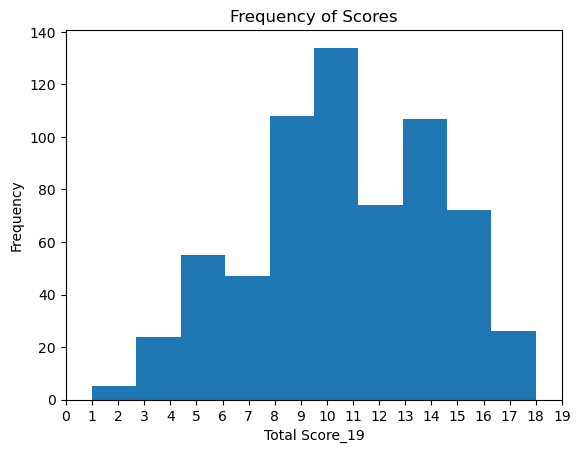

In [5]:
# The following graph represents frequency of each data point on "Total Score_19" or the total score out of 19 questions across the sample.

df2['Total Score_19'].plot(kind = 'hist', xticks = np.arange(0, 20, step=1), xlabel = 'Total Score_19', title = 'Frequency of Scores' )

<Axes: title={'center': 'Absolute mean of scores for above data set'}>

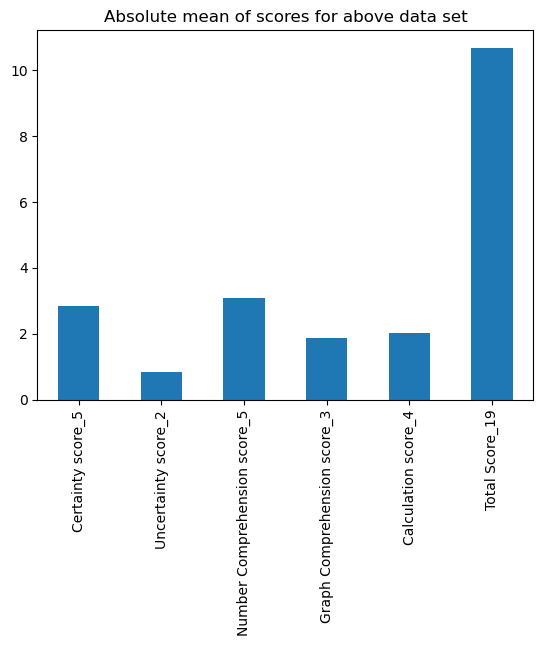

In [6]:
# Absolute mean scores for each facet

(df2[['Certainty score_5','Uncertainty score_2','Number Comprehension score_5','Graph Comprehension score_3','Calculation score_4','Total Score_19']].mean(axis = 0)).plot(kind = 'bar', title = 'Absolute mean of scores for above data set')

<Axes: title={'center': 'Normalised mean of scores for above data set'}>

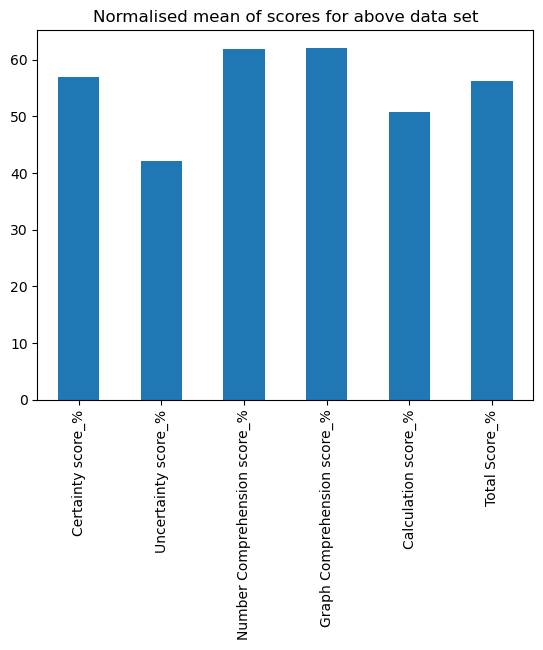

In [7]:
# Normalised mean scores for each facet

df2[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean(axis = 0).plot(kind = 'bar', title = 'Normalised mean of scores for above data set')

In [8]:
# DF3 = Sorted by income

df3 = df2.sort_values(by = 'Q12. Income')
df3 = df3.reset_index(drop = True)
df3.drop(df3[df3['Q12. Income'] == 7].index, inplace = True)

df3

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
0         15717            1          NaN      2   26        2   
1           219            1      80000.0      2   47        3   
2           845            1          NaN      3   50        3   
3          8599            1       2500.0      3   42        3   
4         12715            1        200.0      2   31        2   
..          ...          ...          ...    ...  ...      ...   
572        7893            6       1000.0      1   41        3   
573        6296            6          NaN      1   41        3   
574        5806            6          NaN      1   40        3   
575        1086            6          NaN      1   43        3   
576         679            6          NaN      3   40        3   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
0                    2                    1                             3   
1                    5                    1                             4   
2                    1                    0                             2   
3                    3                    1                             3   
4                    3                    0                             2   
..                 ...                  ...                           ...   
572                  1                    1                             3   
573                  5                    1                             4   
574                  2                    1                             3   
575                  3                    1                             3   
576                  2                    0                             1   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
0                              3                    3              12   
1                              2                    3              15   
2                              1                    1               5   
3                              3                    1              11   
4                              0                    2               7   
..                           ...                  ...             ...   
572                            1                    4              10   
573                            1                    3              14   
574                            2                    3              11   
575                            3                    1              11   
576                            1                    1               5   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
0                   40                   50                            60   
1                  100                   50                            80   
2                   20                    0                            40   
3                   60                   50                            60   
4                   60                    0                            40   
..                 ...                  ...                           ...   
572                 20                   50                            60   
573                100                   50                            80   
574                 40                   50                            60   
575                 60                   50                            60   
576                 40                    0                            20   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  
0                     100.000000                   75      63.157895  
1                      66.666667                   75      78.947368  
2                      33.333333                   25      26.315789  
3                     100.000000                   25      57.894737  
4                       0.000000                   50      36.842105  
..                           ...                  ...      

<Axes: title={'center': 'Absolute mean score for each facet (Sort by Income)'}>

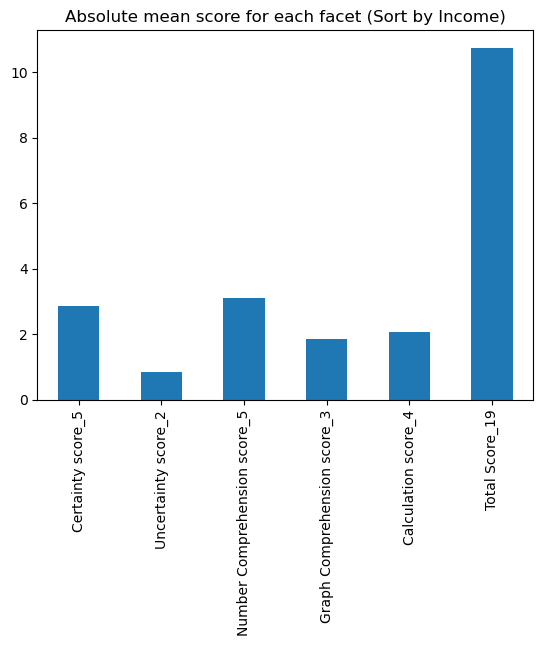

In [9]:
# Absolute mean score for each facet (Sort by Income)

df3[['Certainty score_5','Uncertainty score_2','Number Comprehension score_5','Graph Comprehension score_3','Calculation score_4','Total Score_19']].mean(axis = 0).plot(kind = 'bar', title = 'Absolute mean score for each facet (Sort by Income)')

<Axes: title={'center': 'Normalised mean score for each facet (Sort by Income)'}>

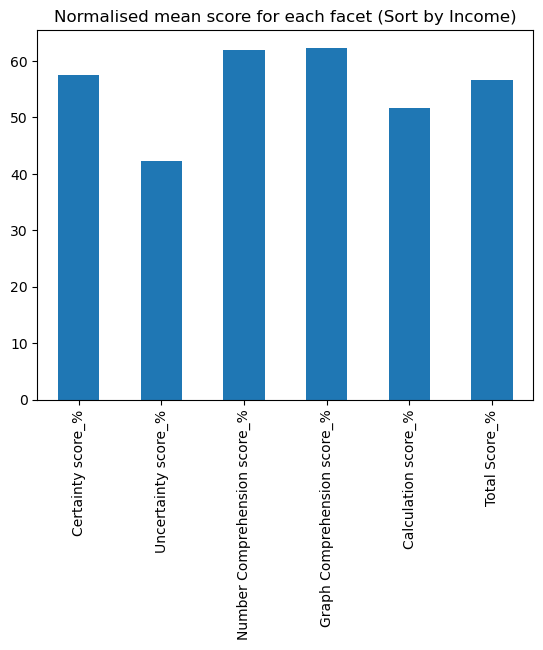

In [10]:
# Normalised mean score for each facet (Sort by Income)

(df3[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean(axis = 0)).plot(kind = 'bar', title = 'Normalised mean score for each facet (Sort by Income)')

In [11]:
# Normalised mean of each facet as a numerical (sorted by income)

df3.groupby('Q12. Income')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%']].mean()

Certainty score_%  Uncertainty score_%  \
Q12. Income                                           
1                    48.888889            38.333333   
2                    57.217391            41.739130   
3                    58.181818            42.045455   
4                    62.886598            46.391753   
5                    52.876712            36.301370   
6                    64.857143            48.571429   

             Number Comprehension score_%  Graph Comprehension score_%  \
Q12. Income                                                              
1                               58.000000                    60.740741   
2                               63.304348                    61.739130   
3                               58.787879                    63.131313   
4                               63.711340                    62.886598   
5                               60.547945                    57.990868   
6                               69.142857                    67.619048   

             Calculation score_%  
Q12. Income                       
1                      45.555556  
2                      50.869565  
3                      50.189394  
4                      55.154639  
5                      50.000000  
6                      59.642857

In [12]:
# Count of responses for each category (sorted by income)

df3.groupby('Q12. Income')[['responseid']].count()

responseid
Q12. Income            
1                    90
2                   115
3                   132
4                    97
5                    73
6                    70

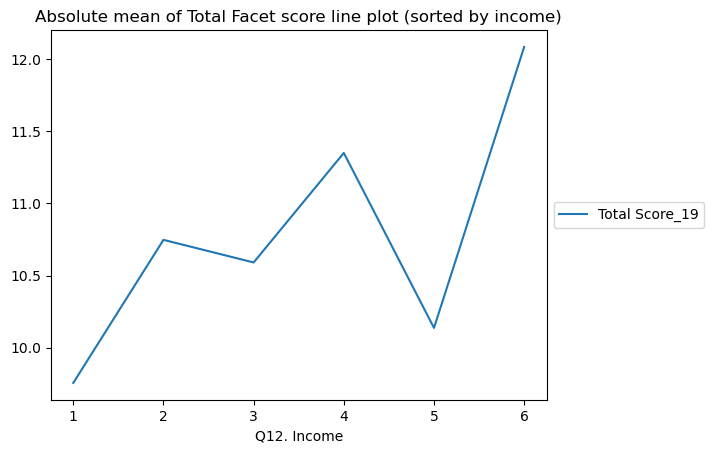

In [13]:
# Absolute mean of Total Facet score line plot (sorted by income)

df3.groupby('Q12. Income')[['Total Score_19']].mean().plot( kind = 'line', title = 'Absolute mean of Total Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

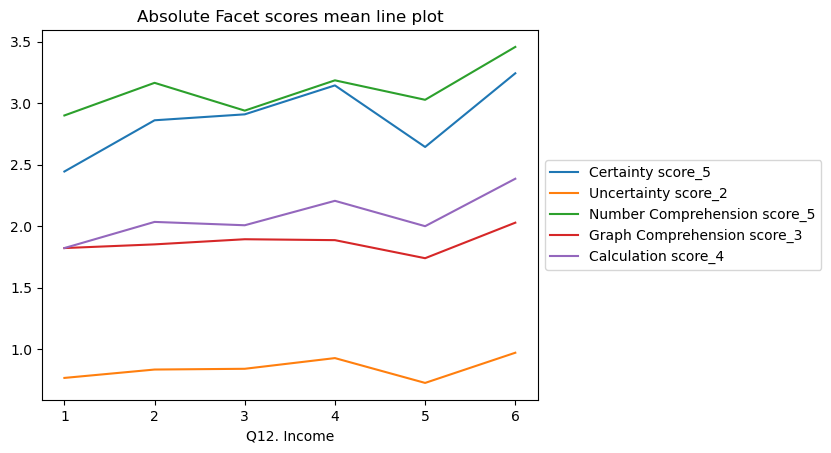

In [14]:
# Absolute mean of each Facet score line plot (sorted by income)

df3.groupby('Q12. Income')[['Certainty score_5','Uncertainty score_2','Number Comprehension score_5','Graph Comprehension score_3','Calculation score_4']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

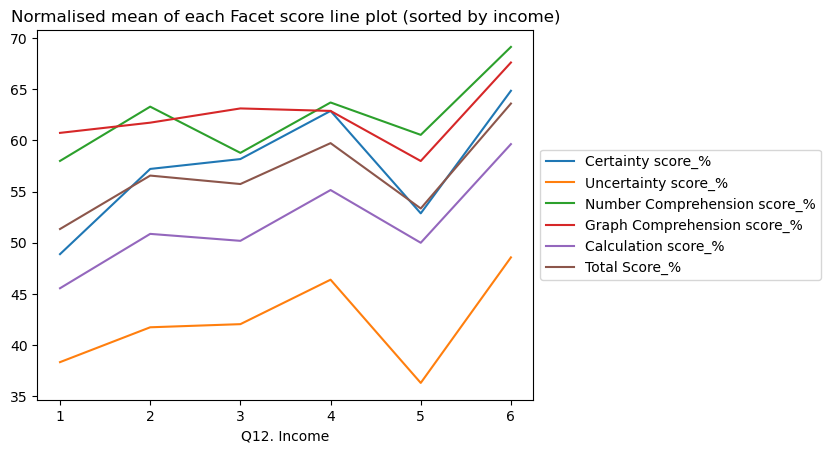

In [15]:
# Normalised mean of each Facet score line plot (sorted by income)


df3.groupby('Q12. Income')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean().plot( kind = 'line', title = 'Normalised mean of each Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

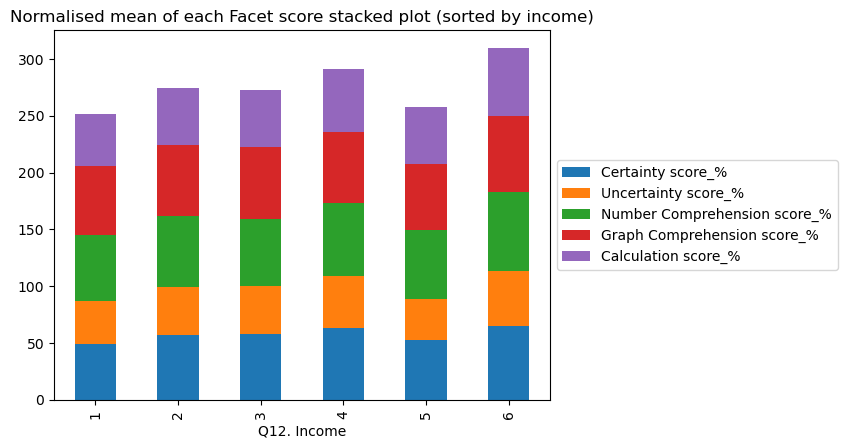

In [16]:
# Normalised mean of each Facet score stacked plot (sorted by income)

df3.groupby('Q12. Income')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%']].mean().plot( kind = 'bar', title = 'Normalised mean of each Facet score stacked plot (sorted by income)', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

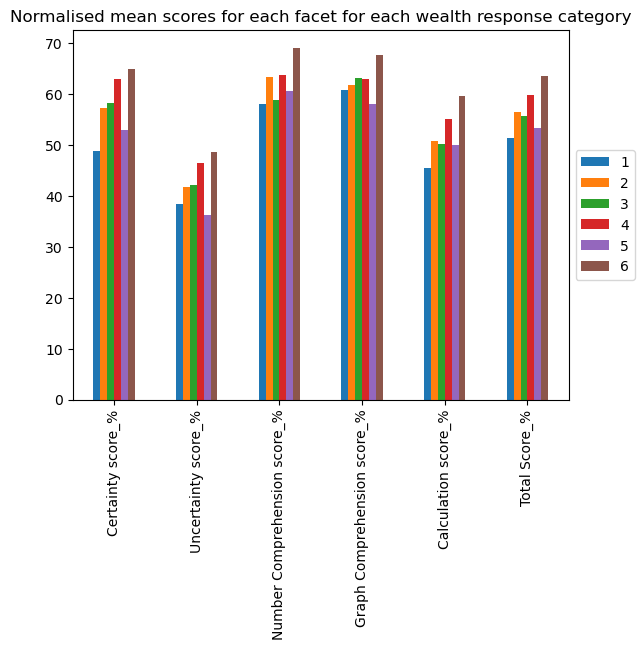

In [17]:
# Normalised mean of each Facet score hist plot (sorted by income)

df3.groupby('Q12. Income')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='Q12. Income', ylabel='Total Score_19'>

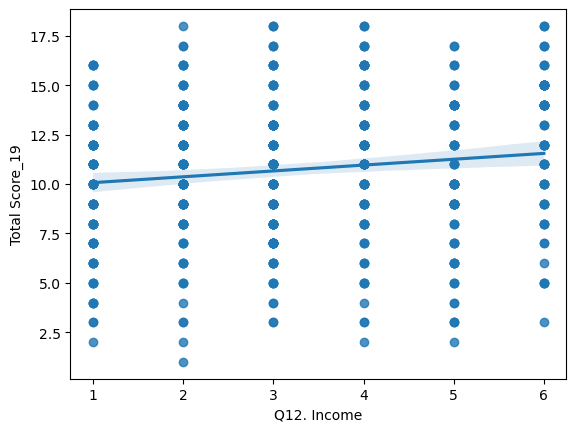

In [18]:
# Trend line for Absolute Total Facet Score vs Q12. Income

sns.regplot (data = df3, x = 'Q12. Income', y = 'Total Score_19')

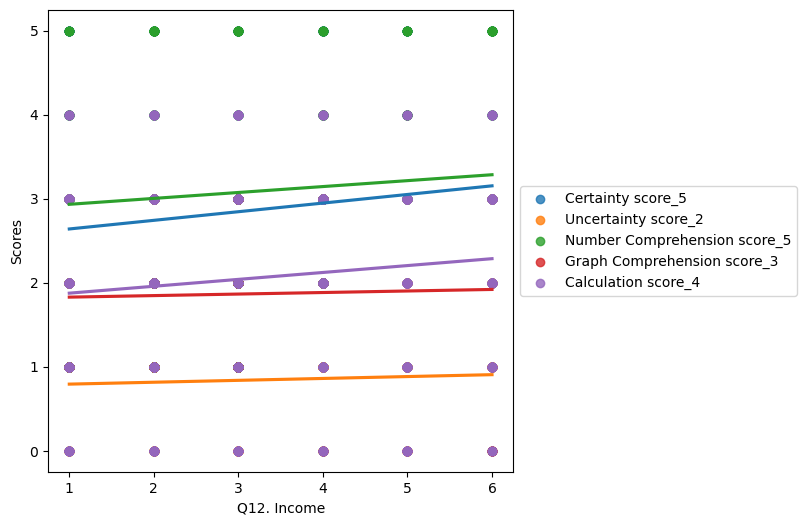

In [19]:
# Trend line for Absolute Independent Facet Score vs Q12. Income reponses

fig, ax = plt.subplots(figsize=(6, 6))

sns.regplot (data = df3, x = 'Q12. Income', y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax, label='Certainty score_5')
sns.regplot (data = df3, x = 'Q12. Income', y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax, label='Uncertainty score_2')
sns.regplot (data = df3, x = 'Q12. Income', y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax, label='Number Comprehension score_5')
sns.regplot (data = df3, x = 'Q12. Income', y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax, label='Graph Comprehension score_3')
sns.regplot (data = df3, x = 'Q12. Income', y = 'Calculation score_4',fit_reg=True, ci=None, ax=ax, label='Calculation score_4' )

ax.set(ylabel='Scores', xlabel='Q12. Income')
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='Q12. Income', ylabel='Total Score_19'>

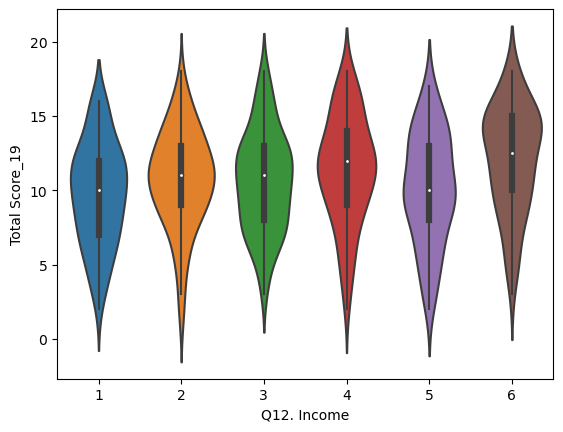

In [20]:
# Violine Plot for Total Score_19 for each entry under Wealth.

sns.violinplot( data = df3, x = 'Q12. Income', y = 'Total Score_19')

<Axes: xlabel='Q12. Income', ylabel='Calculation score_4'>

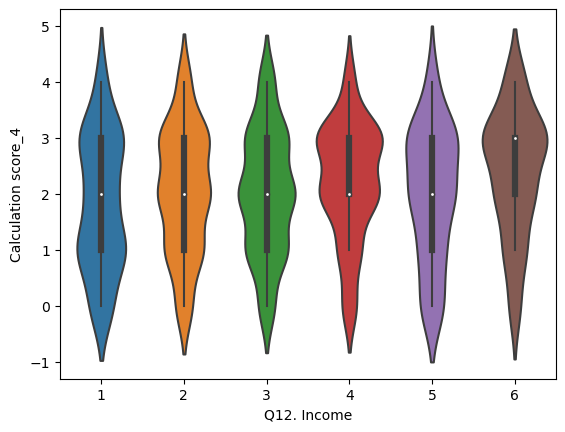

In [21]:
# Violine Plot for Total Score_19 for each entry under Wealth.

sns.violinplot( data = df3, x = 'Q12. Income', y = 'Calculation score_4')

<Axes: xlabel='Q12. Income', ylabel='Graph Comprehension score_3'>

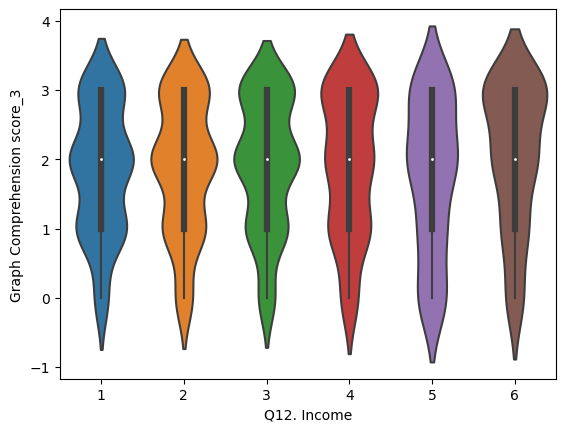

In [22]:
# Violine Plot for Graph Comprehension score_3 for each entry under Wealth.

sns.violinplot( data = df3, x = 'Q12. Income', y = 'Graph Comprehension score_3')

<Axes: xlabel='Q12. Income', ylabel='Number Comprehension score_5'>

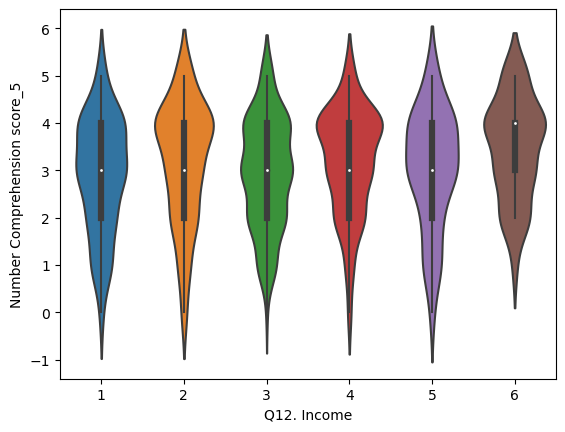

In [23]:
# Violine Plot for Number Comprehension score_5 for each entry under Wealth.

sns.violinplot( data = df3, x = 'Q12. Income', y = 'Number Comprehension score_5')

<Axes: xlabel='Q12. Income', ylabel='Uncertainty score_2'>

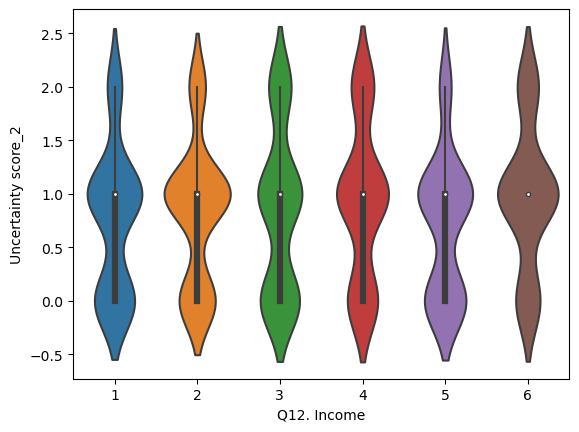

In [24]:
# Violine Plot for Uncertainty score_2 for each entry under Wealth.

sns.violinplot( data = df3, x = 'Q12. Income', y = 'Uncertainty score_2')

<Axes: xlabel='Q12. Income', ylabel='Certainty score_5'>

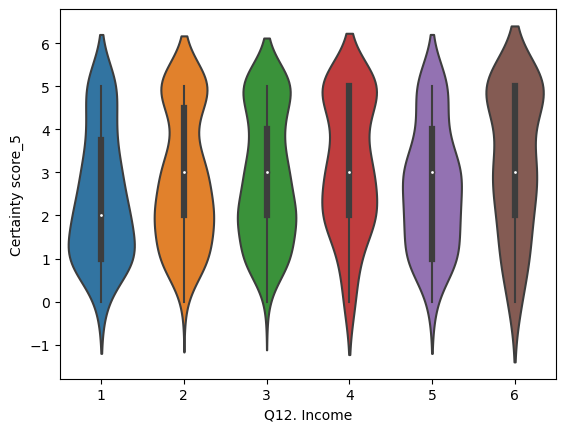

In [25]:
# Violine Plot for Certainty score_5 for each entry under Wealth.

sns.violinplot( data = df3, x = 'Q12. Income', y = 'Certainty score_5')

In [26]:
# Data Frame 2 or df2 is an aggregate data on facet total scores and over all total score, along with wealth and income data vs each response. 
# This data set is also sorted by wealth with all responses 'NA' removed.
# We also assign quartiles ranking each response according to this sort.

df4 = df2.sort_values(by = 'Q14. Wealth')
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(axis = 0, subset = 'Q14. Wealth')
df4.insert(loc = len(df4.columns), column = "Quartile Number", value = pd.qcut(df4["Q14. Wealth"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df4

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
0          2305            4          0.0      1   29        2   
1          5760            3          0.0      2   57        3   
2          5463            6          0.0      1   30        2   
3           796            2          0.0      1   35        2   
4          2578            3          0.0      3   33        2   
..          ...          ...          ...    ...  ...      ...   
375          15            6    1250000.0      2   68        4   
376         970            6    1350000.0      3   64        4   
377        5592            7    1500000.0      2   64        4   
378       10809            6    1650000.0      1   59        3   
379         278            6    3500000.0      1   66        4   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
0                    1                    0                             3   
1                    1                    0                             3   
2                    2                    1                             4   
3                    5                    2                             4   
4                    1                    0                             2   
..                 ...                  ...                           ...   
375                  2                    1                             4   
376                  2                    1                             4   
377                  3                    1                             5   
378                  3                    2                             5   
379                  5                    2                             3   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
0                              2                    2               8   
1                              3                    1               8   
2                              3                    2              12   
3                              2                    3              16   
4                              2                    0               5   
..                           ...                  ...             ...   
375                            3                    3              13   
376                            3                    4              14   
377                            3                    3              15   
378                            3                    2              15   
379                            3                    4              17   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
0                   20                    0                            60   
1                   20                    0                            60   
2                   40                   50                            80   
3                  100                  100                            80   
4                   20                    0                            40   
..                 ...                  ...                           ...   
375                 40                   50                            80   
376                 40                   50                            80   
377                 60                   50                           100   
378                 60                  100                           100   
379                100                  100                            60   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  \
0                      66.666667                   50      42.105263   
1                     100.000000                   25      42.105263   
2                     100.000000                   50      63.157895   
3                      66.666667                   75      84.210526   
4                      66.666667                    0      26.315789   
..                           ...                  ...

<Axes: title={'center': 'Absolute mean score for each facet (Sort by Wealth)'}>

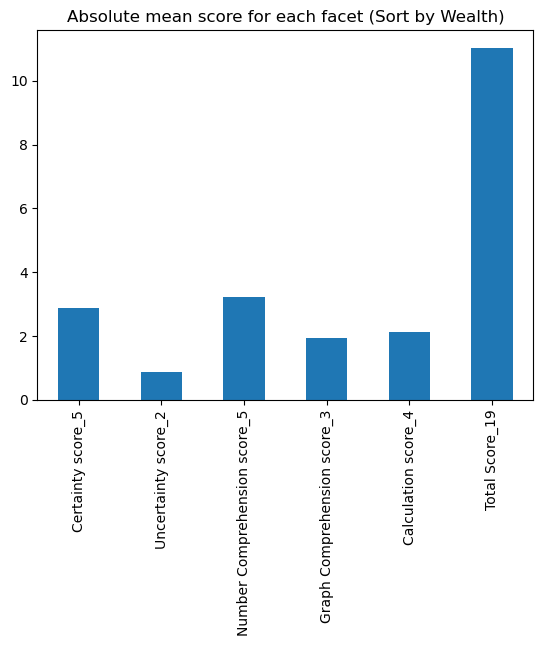

In [27]:
# Absolute mean score for each facet (Sort by Wealth)

df4[['Certainty score_5','Uncertainty score_2','Number Comprehension score_5','Graph Comprehension score_3','Calculation score_4','Total Score_19']].mean(axis = 0).plot(kind = 'bar', title = 'Absolute mean score for each facet (Sort by Wealth)')

<Axes: title={'center': 'Normalised mean score for each facet (Sort by Wealth)'}>

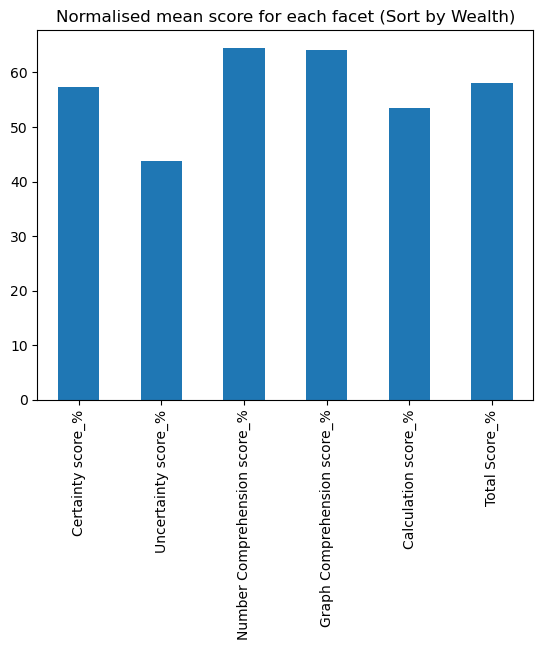

In [28]:
# Normalised mean score for each facet (Sort by Wealth)

(df4[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean(axis = 0)).plot(kind = 'bar', title = 'Normalised mean score for each facet (Sort by Wealth)')

<Axes: title={'center': 'Total responses line plot sorted by Wealth'}, xlabel='Unique responses sorted by wealth', ylabel='Total Score_19'>

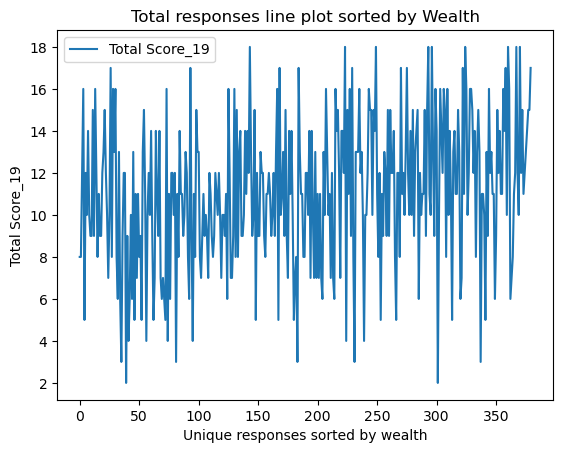

In [29]:
# Line Plot of Absolute Total Facet score vs sorted wealth

df4.plot(use_index = 'True' , kind = 'line', y = ['Total Score_19'], title = 'Total responses line plot sorted by Wealth',xlabel = 'Unique responses sorted by wealth', ylabel = 'Total Score_19')

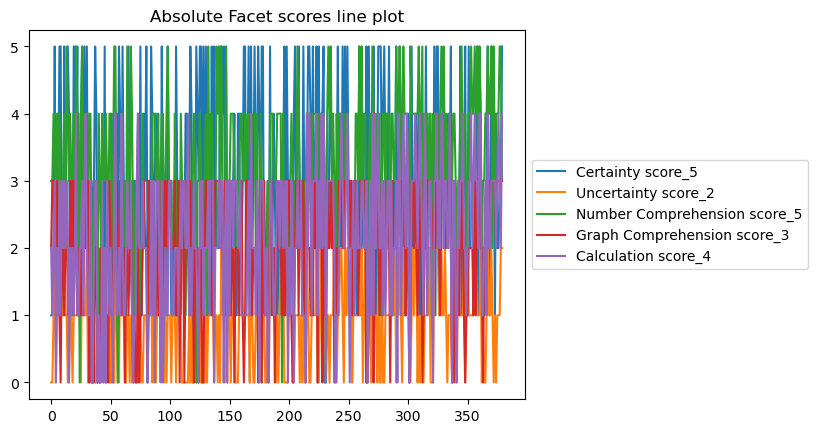

In [30]:
# Absolute Facet scores line plot from low to high wealth 
# I do understand that this is non readable

df4[['Certainty score_5','Uncertainty score_2','Number Comprehension score_5','Graph Comprehension score_3','Calculation score_4']].plot( kind = 'line', title = 'Absolute Facet scores line plot', use_index = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: ylabel='Total Score_19'>

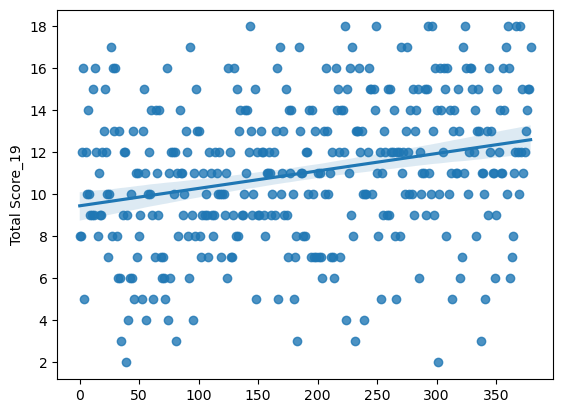

In [31]:
# Trend line for Absolute Total Facet Score vs unique Q14. Wealth reponses

sns.regplot (data = df4, x = df4.index, y = 'Total Score_19')

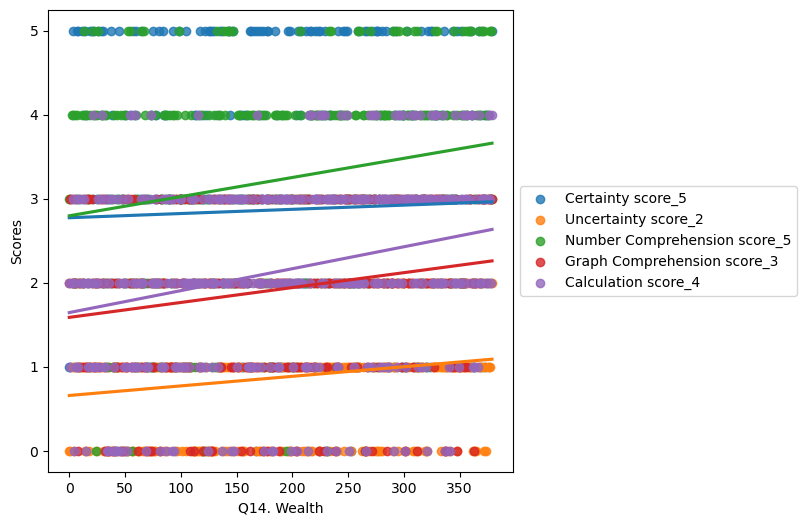

In [32]:
# Trend line for Absolute Independent Facet Score vs Q14. Wealth reponses

fig1, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = df4.index, y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax1, label='Certainty score_5')
sns.regplot (data = df4, x = df4.index, y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax1, label='Uncertainty score_2')
sns.regplot (data = df4, x = df4.index, y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax1, label='Number Comprehension score_5')
sns.regplot (data = df4, x = df4.index, y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax1, label='Graph Comprehension score_3')
sns.regplot (data = df4, x = df4.index, y = 'Calculation score_4',fit_reg=True, ci=None, ax=ax1, label='Calculation score_4' )

ax1.set(ylabel='Scores', xlabel='Q14. Wealth')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [33]:
# Count of number of responses under each quartile

df4.groupby('Quartile Number')[['Quartile Number']].count()

Quartile Number
Quartile Number                 
1                            122
2                             74
3                             89
4                             95

In [34]:
df4.loc[df4['Quartile Number']==1]

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
0          2305            4          0.0      1   29        2   
1          5760            3          0.0      2   57        3   
2          5463            6          0.0      1   30        2   
3           796            2          0.0      1   35        2   
4          2578            3          0.0      3   33        2   
..          ...          ...          ...    ...  ...      ...   
117        8449            2       5000.0      3   38        3   
118        8979            2       5000.0      3   26        2   
119       10476            4       5000.0      1   23        2   
120        9214            3       5000.0      2   35        2   
121        1952            1       5000.0      3   61        4   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
0                    1                    0                             3   
1                    1                    0                             3   
2                    2                    1                             4   
3                    5                    2                             4   
4                    1                    0                             2   
..                 ...                  ...                           ...   
117                  5                    0                             2   
118                  4                    1                             3   
119                  0                    0                             3   
120                  3                    0                             4   
121                  1                    2                             3   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
0                              2                    2               8   
1                              3                    1               8   
2                              3                    2              12   
3                              2                    3              16   
4                              2                    0               5   
..                           ...                  ...             ...   
117                            3                    2              12   
118                            1                    1              10   
119                            2                    2               7   
120                            0                    3              10   
121                            2                    2              10   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
0                   20                    0                            60   
1                   20                    0                            60   
2                   40                   50                            80   
3                  100                  100                            80   
4                   20                    0                            40   
..                 ...                  ...                           ...   
117                100                    0                            40   
118                 80                   50                            60   
119                  0                    0                            60   
120                 60                    0                            80   
121                 20                  100                            60   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  \
0                      66.666667                   50      42.105263   
1                     100.000000                   25      42.105263   
2                     100.000000                   50      63.157895   
3                      66.666667                   75      84.210526   
4                      66.666667                    0      26.315789   
..                           ...                  ...

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q1'}, xlabel='Unique responses', ylabel='Total Score_19'>

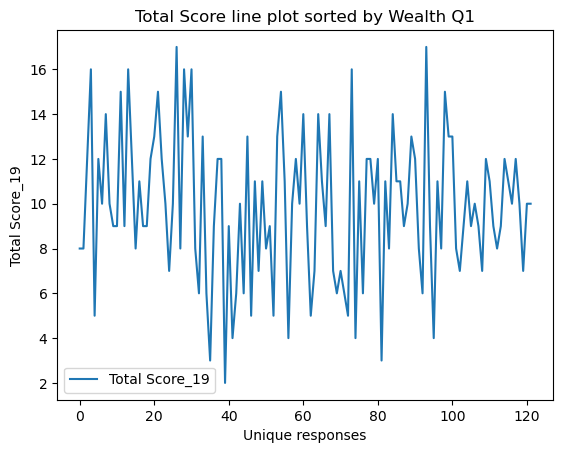

In [35]:
# This graph is basically a line plot of the Total score_19 across first quartile unique responses which are ordered by income

df4.loc[df4['Quartile Number']==1].plot(use_index = 'True' , kind = 'line', y = ['Total Score_19'], title = 'Total Score line plot sorted by Wealth Q1',xlabel = 'Unique responses', ylabel = 'Total Score_19')

<Axes: ylabel='Total Score_19'>

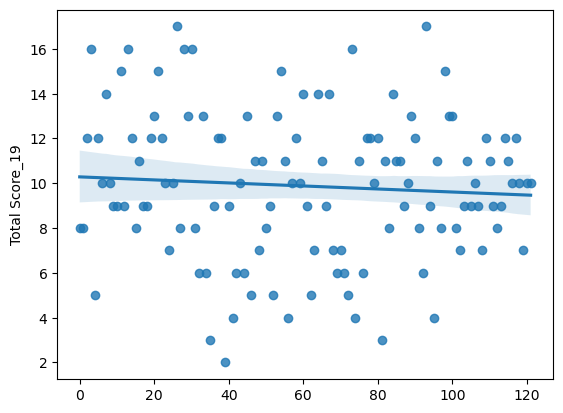

In [36]:
# Trend line for Absolute Total Facet Score vs unique Q14. Income reponses in Quartile 1

sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Total Score_19')

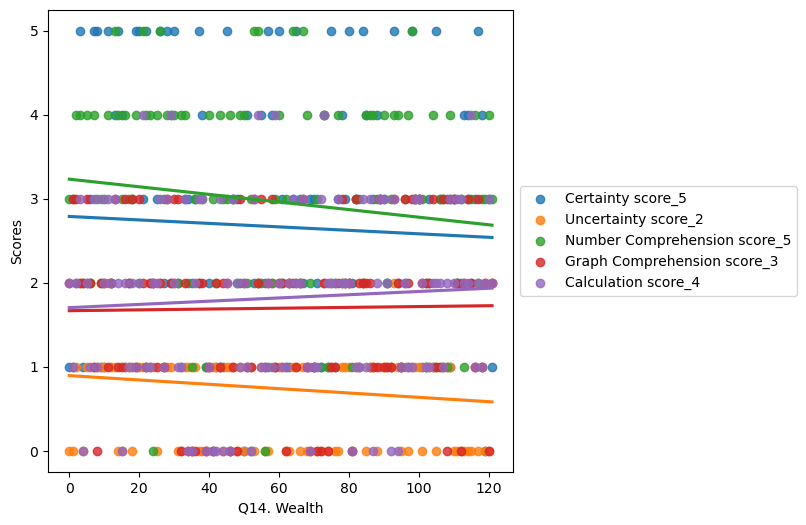

In [37]:
# Trend line for Absolute Independent Facet Score vs Q14. Wealth reponses in Quartile 1

fig1, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax2, label='Certainty score_5')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax2, label='Uncertainty score_2')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax2, label='Number Comprehension score_5')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax2, label='Graph Comprehension score_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Calculation score_4',fit_reg=True, ci=None, ax=ax2, label='Calculation score_4' )

ax2.set(ylabel='Scores', xlabel='Q14. Wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [38]:
df4.loc[df4['Quartile Number']==2]

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
122        2053            2       6000.0      3   23        2   
123        1326            1       6200.0      1   49        3   
124       10822            5       6666.0      2   28        2   
125        6128            1       8000.0      1   25        2   
126       13429            2       8000.0      2   24        2   
..          ...          ...          ...    ...  ...      ...   
191       11387            6      30000.0      2   37        3   
192       13397            3      30000.0      1   28        2   
193        6789            4      30000.0      1   52        3   
194         391            2      30000.0      3   52        3   
195       10277            6      30000.0      1   31        2   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
122                  5                    0                             0   
123                  4                    1                             3   
124                  3                    0                             3   
125                  5                    2                             4   
126                  5                    0                             3   
..                 ...                  ...                           ...   
191                  3                    0                             4   
192                  1                    1                             4   
193                  3                    2                             4   
194                  2                    1                             0   
195                  3                    2                             4   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
122                            2                    2               9   
123                            2                    1              11   
124                            0                    0               6   
125                            2                    3              16   
126                            2                    2              12   
..                           ...                  ...             ...   
191                            2                    3              12   
192                            2                    2              10   
193                            2                    3              14   
194                            1                    3               7   
195                            3                    2              14   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
122                100                    0                             0   
123                 80                   50                            60   
124                 60                    0                            60   
125                100                  100                            80   
126                100                    0                            60   
..                 ...                  ...                           ...   
191                 60                    0                            80   
192                 20                   50                            80   
193                 60                  100                            80   
194                 40                   50                             0   
195                 60                  100                            80   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  \
122                    66.666667                   50      47.368421   
123                    66.666667                   25      57.894737   
124                     0.000000                    0      31.578947   
125                    66.666667                   75      84.210526   
126                    66.666667                   50      63.157895   
..                           ...                  ...

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q1'}, xlabel='Unique responses', ylabel='Total Score_19'>

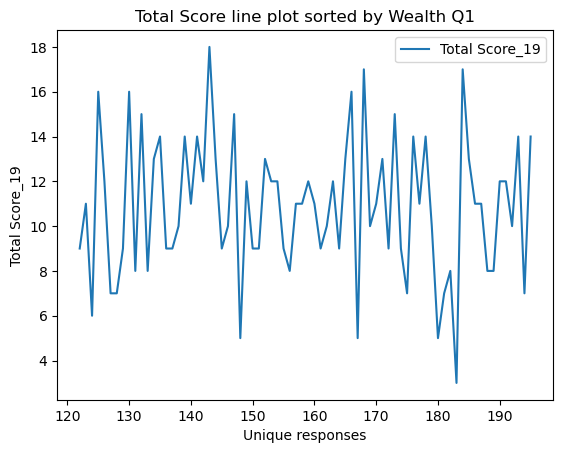

In [39]:
# This graph is basically a line plot of the Total score_19 across second quartile unique responses which are ordered by income

df4.loc[df4['Quartile Number']==2].plot(use_index = 'True' , kind = 'line', y = ['Total Score_19'], title = 'Total Score line plot sorted by Wealth Q1',xlabel = 'Unique responses', ylabel = 'Total Score_19')

<Axes: ylabel='Total Score_19'>

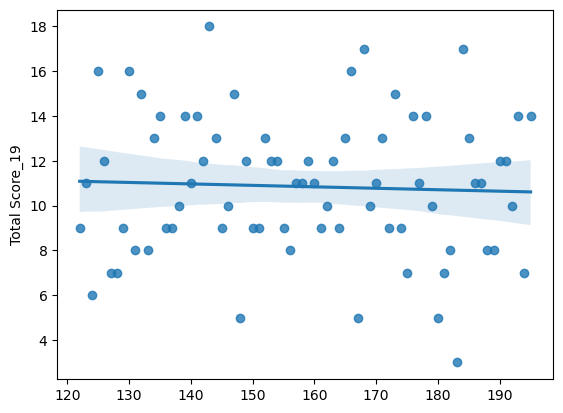

In [40]:
# Trend line for Absolute Total Facet Score vs unique Q14. Wealth reponses in Quartile 2

sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Total Score_19')

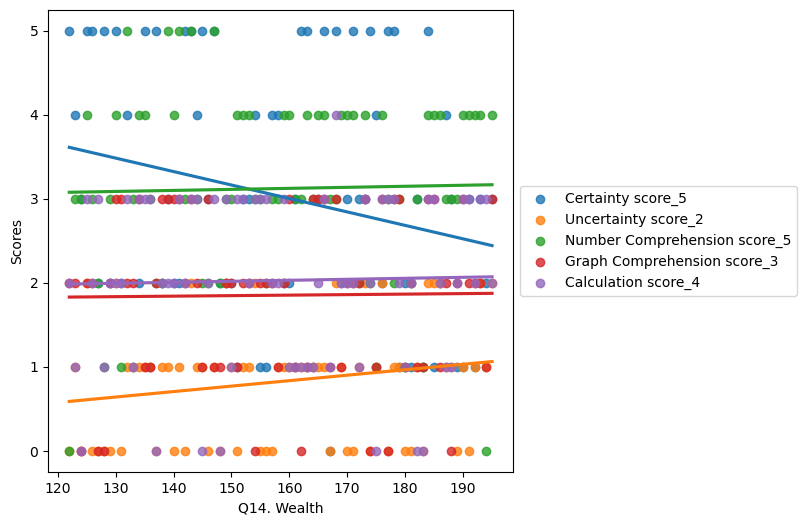

In [41]:
# Trend line for Absolute Independent Facet Score vs Q14. Wealth reponses in Quartile 2

fig1, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax3, label='Certainty score_5')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax3, label='Uncertainty score_2')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax3, label='Number Comprehension score_5')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax3, label='Graph Comprehension score_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Calculation score_4',fit_reg=True, ci=None, ax=ax3, label='Calculation score_4' )

ax3.set(ylabel='Scores', xlabel='Q14. Wealth')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [42]:
df4.loc[df4['Quartile Number']==3]

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
196        5909            3      32500.0      2   30        2   
197       10855            4      34000.0      2   55        3   
198       14112            3      34865.0      2   32        2   
199       13314            5      35000.0      2   30        2   
200       10801            3      35000.0      2   52        3   
..          ...          ...          ...    ...  ...      ...   
280        9549            4     160000.0      2   42        3   
281        9194            3     160000.0      2   43        3   
282        1013            5     175000.0      3   73        4   
283        8166            6     175000.0      2   60        4   
284        5837            4     180000.0      2   54        3   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
196                  5                    0                             1   
197                  2                    0                             2   
198                  5                    0                             3   
199                  3                    0                             1   
200                  1                    2                             3   
..                 ...                  ...                           ...   
280                  5                    0                             4   
281                  3                    1                             2   
282                  4                    1                             4   
283                  3                    1                             4   
284                  5                    1                             4   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
196                            1                    3              10   
197                            1                    2               7   
198                            2                    3              13   
199                            3                    0               7   
200                            3                    2              11   
..                           ...                  ...             ...   
280                            3                    3              15   
281                            2                    1               9   
282                            2                    2              13   
283                            3                    3              14   
284                            2                    3              15   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
196                100                    0                            20   
197                 40                    0                            40   
198                100                    0                            60   
199                 60                    0                            20   
200                 20                  100                            60   
..                 ...                  ...                           ...   
280                100                    0                            80   
281                 60                   50                            40   
282                 80                   50                            80   
283                 60                   50                            80   
284                100                   50                            80   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  \
196                    33.333333                   75      52.631579   
197                    33.333333                   50      36.842105   
198                    66.666667                   75      68.421053   
199                   100.000000                    0      36.842105   
200                   100.000000                   50      57.894737   
..                           ...                  ...

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q3'}, xlabel='Unique responses', ylabel='Total Score_19'>

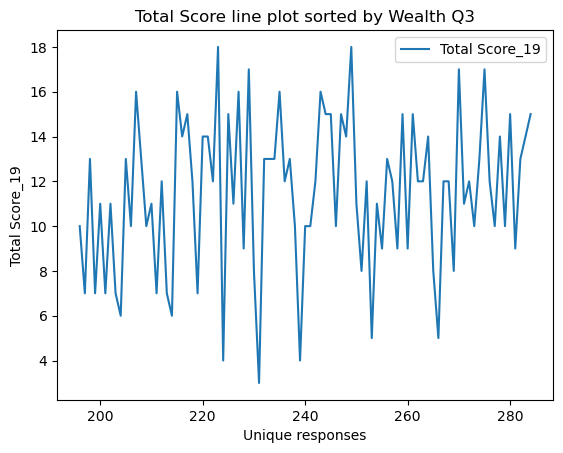

In [43]:
# This graph is basically a line plot of the Total score_19 across third quartile unique responses which are ordered by wealth

df4.loc[df4['Quartile Number']==3].plot(use_index = 'True' , kind = 'line', y = ['Total Score_19'], title = 'Total Score line plot sorted by Wealth Q3',xlabel = 'Unique responses', ylabel = 'Total Score_19')

<Axes: ylabel='Total Score_19'>

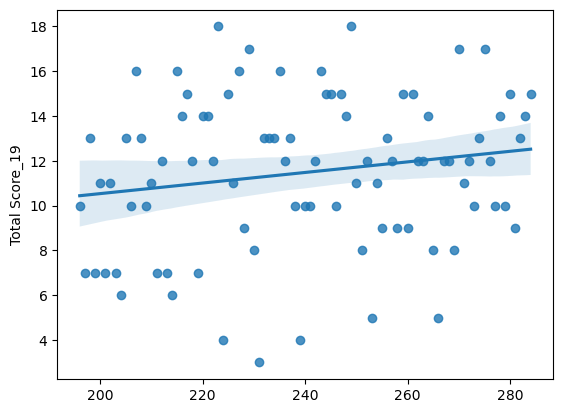

In [44]:
# Trend line for Absolute Total Facet Score vs unique Q14. Wealth reponses in Quartile 3

sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Total Score_19')

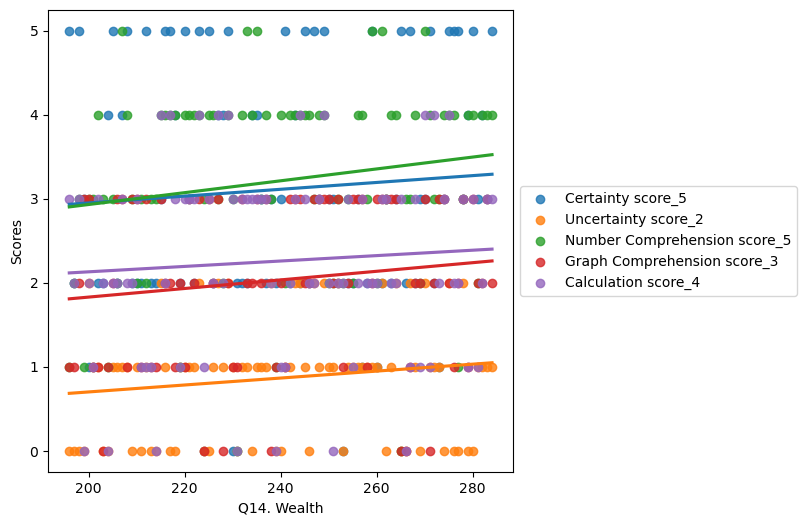

In [45]:
# Trend line for Absolute Independent Facet Score vs Q14. Wealth reponses in Quartile 3

fig1, ax4 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax4, label='Certainty score_5')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax4, label='Uncertainty score_2')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax4, label='Number Comprehension score_5')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax4, label='Graph Comprehension score_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Calculation score_4',fit_reg=True, ci=None, ax=ax4, label='Calculation score_4' )

ax4.set(ylabel='Scores', xlabel='Q14. Wealth')
ax4.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
df4.loc[df4['Quartile Number']==4]

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
285       11536            4     185000.0      2   51        3   
286        1315            2     200000.0      2   57        3   
287         490            1     200000.0      3   65        4   
288       13403            5     200000.0      2   32        2   
289       13350            6     200000.0      1   30        2   
..          ...          ...          ...    ...  ...      ...   
375          15            6    1250000.0      2   68        4   
376         970            6    1350000.0      3   64        4   
377        5592            7    1500000.0      2   64        4   
378       10809            6    1650000.0      1   59        3   
379         278            6    3500000.0      1   66        4   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
285                  2                    1                             2   
286                  1                    2                             4   
287                  1                    1                             4   
288                  3                    1                             3   
289                  2                    2                             3   
..                 ...                  ...                           ...   
375                  2                    1                             4   
376                  2                    1                             4   
377                  3                    1                             5   
378                  3                    2                             5   
379                  5                    2                             3   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
285                            0                    1               6   
286                            2                    3              12   
287                            3                    1              10   
288                            2                    2              11   
289                            2                    2              11   
..                           ...                  ...             ...   
375                            3                    3              13   
376                            3                    4              14   
377                            3                    3              15   
378                            3                    2              15   
379                            3                    4              17   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
285                 40                   50                            40   
286                 20                  100                            80   
287                 20                   50                            80   
288                 60                   50                            60   
289                 40                  100                            60   
..                 ...                  ...                           ...   
375                 40                   50                            80   
376                 40                   50                            80   
377                 60                   50                           100   
378                 60                  100                           100   
379                100                  100                            60   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  \
285                     0.000000                   25      31.578947   
286                    66.666667                   75      63.157895   
287                   100.000000                   25      52.631579   
288                    66.666667                   50      57.894737   
289                    66.666667                   50      57.894737   
..                           ...                  ...

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q4'}, xlabel='Unique responses', ylabel='Total Score_19'>

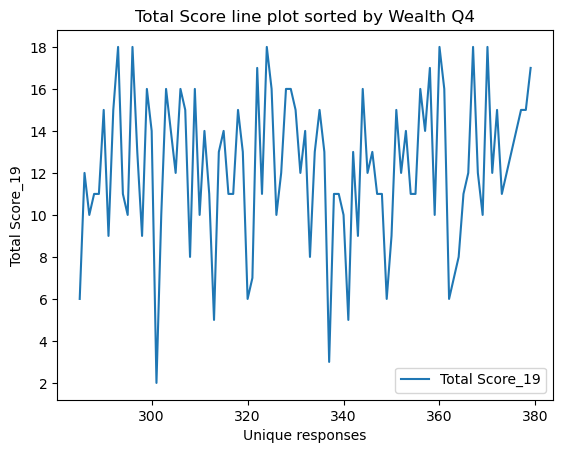

In [47]:
# This graph is basically a line plot of the Total score_19 across fourth quartile unique responses which are ordered by Wealth

df4.loc[df4['Quartile Number']==4].plot(use_index = 'True' , kind = 'line', y = ['Total Score_19'], title = 'Total Score line plot sorted by Wealth Q4',xlabel = 'Unique responses', ylabel = 'Total Score_19')

<Axes: ylabel='Total Score_19'>

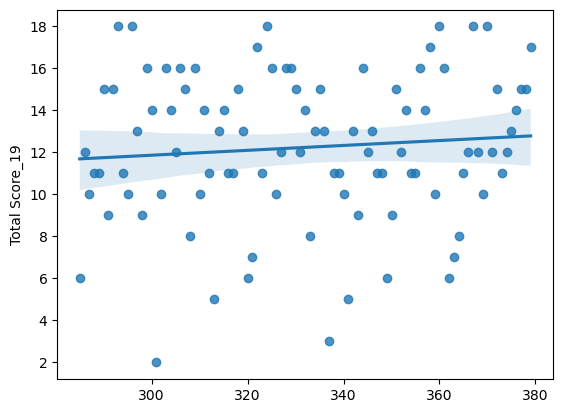

In [48]:
# Trend line for Absolute Total Facet Score vs unique Q14. Wealth reponses in Quartile 4

sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Total Score_19')

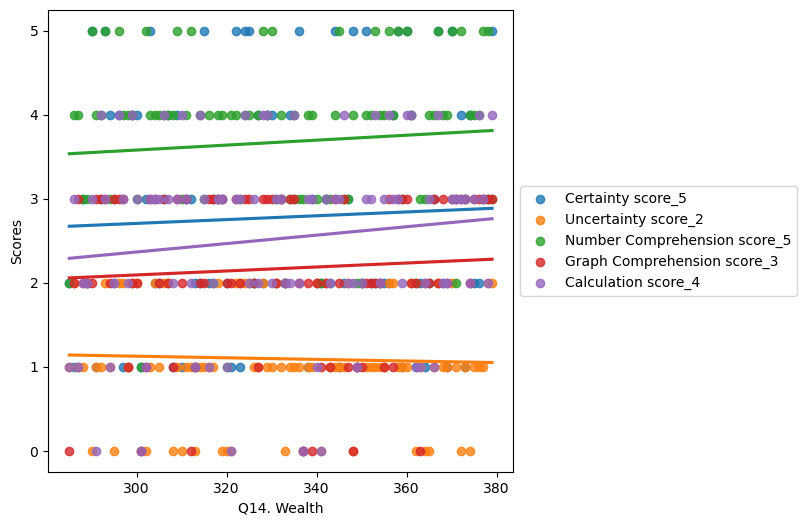

In [49]:
# Trend line for Absolute Independent Facet Score vs Q14. Wealth reponses in Quartile 4

fig1, ax5 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax5, label='Certainty score_5')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax5, label='Uncertainty score_2')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax5, label='Number Comprehension score_5')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax5, label='Graph Comprehension score_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Calculation score_4',fit_reg=True, ci=None, ax=ax5, label='Calculation score_4' )

ax5.set(ylabel='Scores', xlabel='Q14. Wealth')
ax5.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

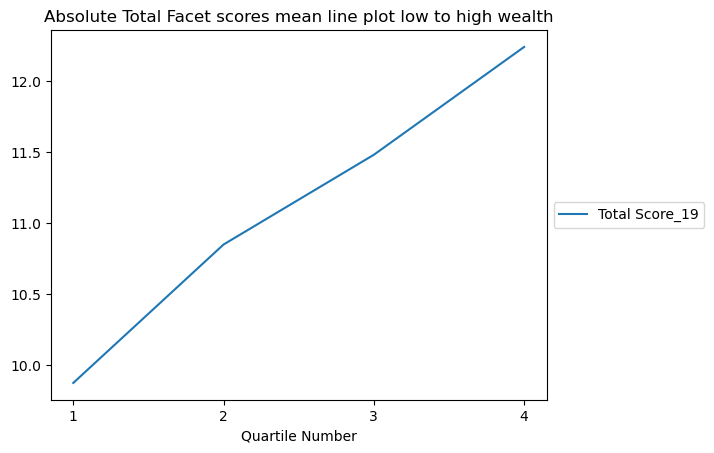

In [50]:
# Absolute Total Facet scores mean line plot from low to high Wealth

df4.groupby('Quartile Number')[['Total Score_19']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

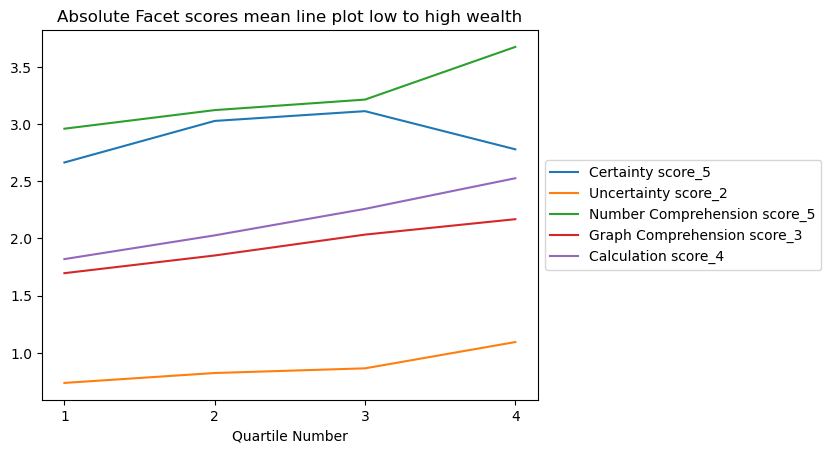

In [51]:
# Absolute Facet scores mean line plot from low to high wealth

df4.groupby('Quartile Number')[['Certainty score_5','Uncertainty score_2','Number Comprehension score_5','Graph Comprehension score_3','Calculation score_4']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

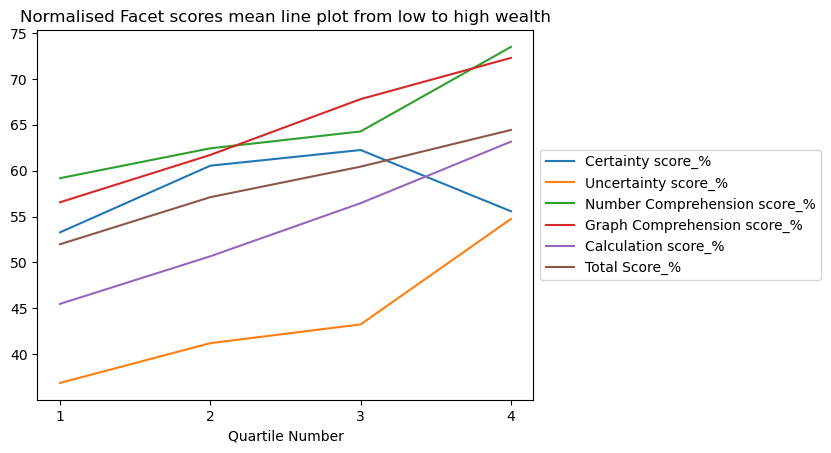

In [52]:
# Normalised Facet scores mean line plot from low to high wealth


df4.groupby('Quartile Number')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot from low to high wealth',  xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

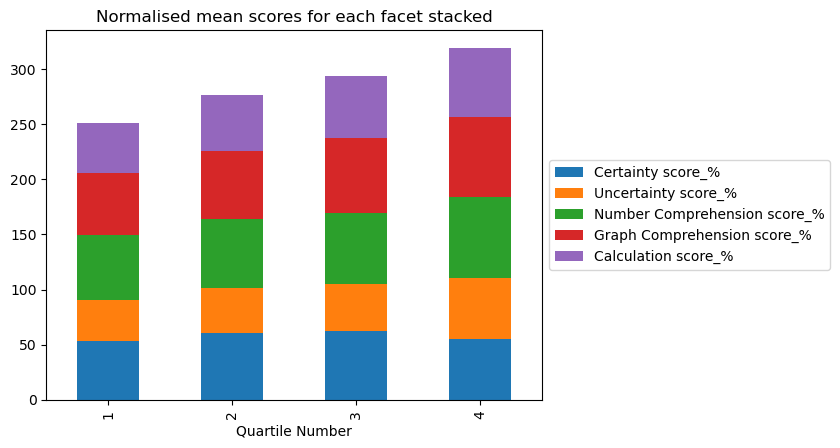

In [53]:
# Normalised mean scores for each facet stacked

df4.groupby('Quartile Number')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

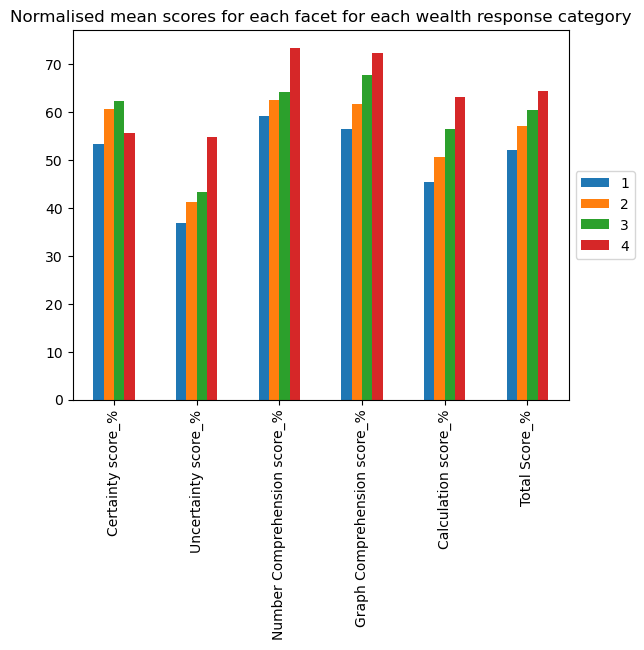

In [54]:
# Normalised mean scores for each facet for each wealth response Quartile

df4.groupby('Quartile Number')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='Quartile Number', ylabel='Total Score_19'>

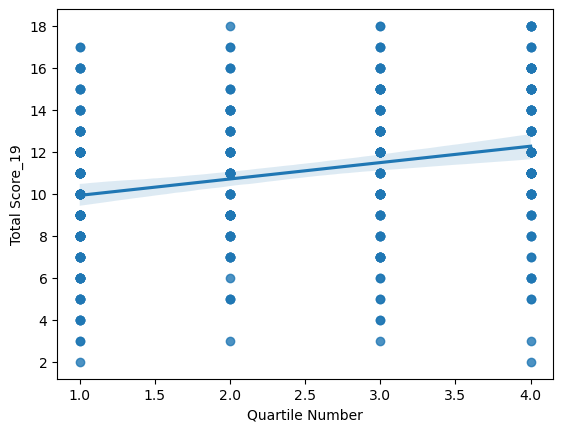

In [55]:
# Trend line for Absolute Total Facet Score vs Quartiles

sns.regplot (data = df4, x = 'Quartile Number', y = 'Total Score_19')

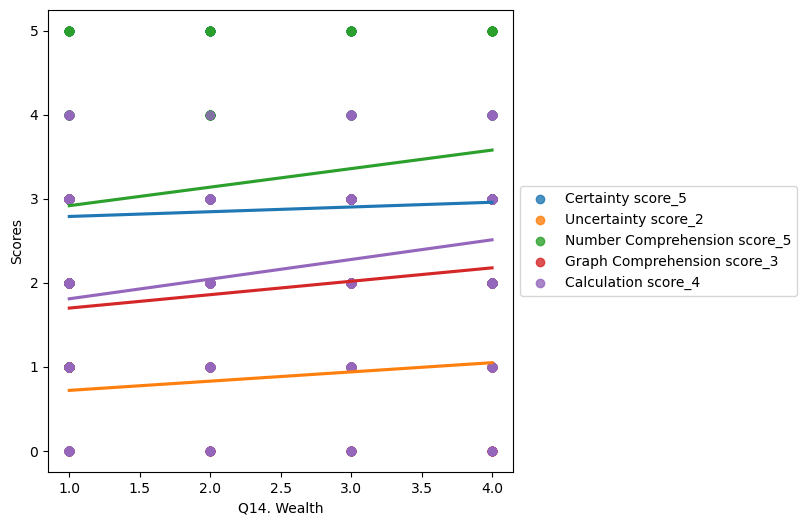

In [56]:
# Trend line for Absolute Independent Facet Score vs Quartiles

fig2, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = 'Quartile Number', y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax2, label='Certainty score_5')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax2, label='Uncertainty score_2')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax2, label='Number Comprehension score_5')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax2, label='Graph Comprehension score_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Calculation score_4',fit_reg=True, ci=None, ax=ax2, label='Calculation score_4' )

ax2.set(ylabel='Scores', xlabel='Q14. Wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='Quartile Number', ylabel='Total Score_19'>

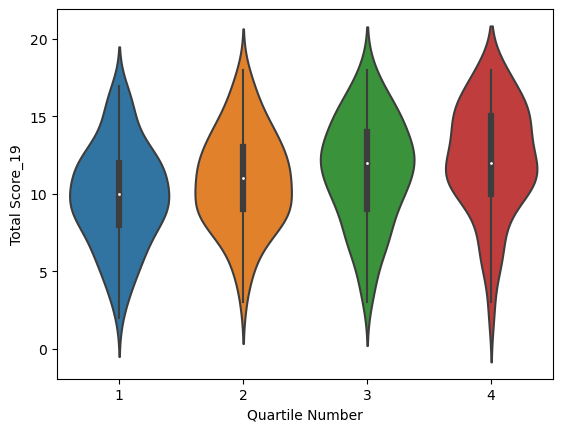

In [57]:
# Violine Plot for Total Score_19 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Total Score_19')

<Axes: xlabel='Quartile Number', ylabel='Calculation score_4'>

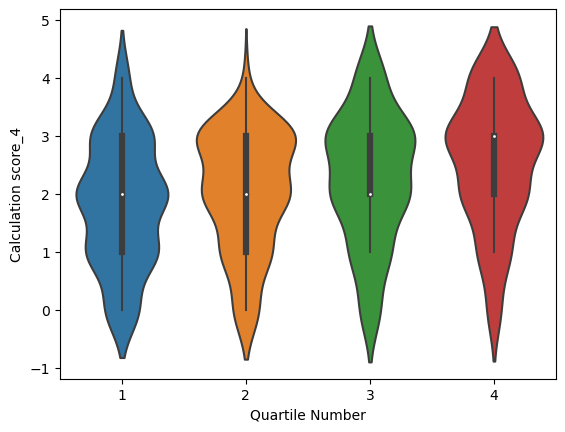

In [58]:
# Violine Plot for Calculation score_4 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Calculation score_4')

<Axes: xlabel='Quartile Number', ylabel='Graph Comprehension score_3'>

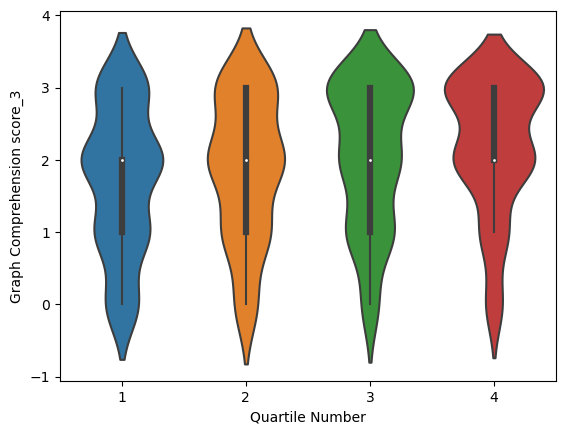

In [59]:
# Violine Plot for Graph Comprehension score_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Graph Comprehension score_3')

<Axes: xlabel='Quartile Number', ylabel='Number Comprehension score_5'>

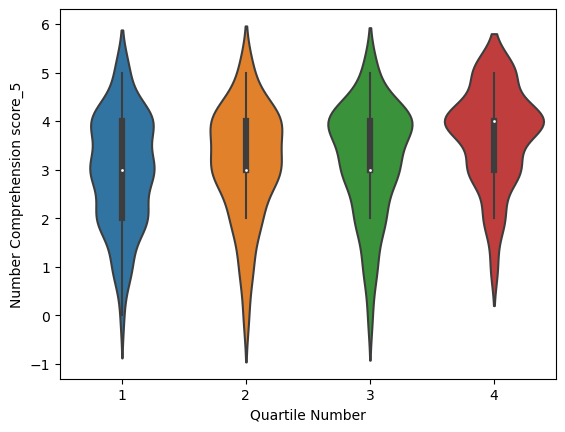

In [60]:
# Violine Plot for Number Comprehension score_5 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Number Comprehension score_5')

<Axes: xlabel='Quartile Number', ylabel='Certainty score_5'>

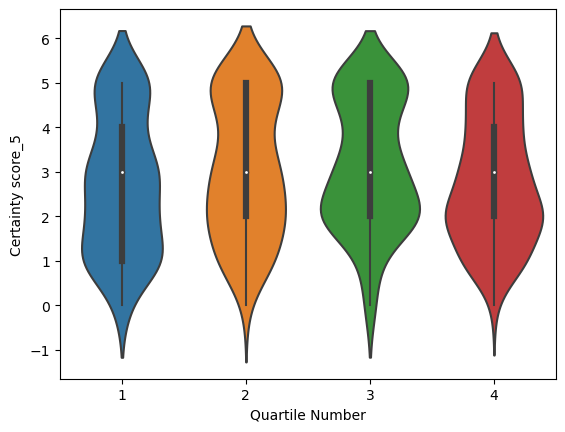

In [61]:
# Violine Plot for Certainty score_5 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Certainty score_5')

In [62]:
# Data Frame 5 or df5 is an aggregate data on facet total scores and over all total score, along with  education data vs each response. 
# This data set is now sorted by education.

df5 = df2.sort_values(by = 'isced')
df5 = df5.reset_index(drop = True)

df5

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
0          6873            6          NaN      1   25        2   
1          7875            5          NaN      1   63        4   
2          7876            6      25000.0      1   41        3   
3          7877            7          NaN      1   55        3   
4          7884            6     950000.0      1   52        3   
..          ...          ...          ...    ...  ...      ...   
647          78            1          NaN      3   51        3   
648        6130            1          NaN      3   32        2   
649        6138            7          NaN      3   34        2   
650         467            7          NaN      3   55        3   
651         405            2          NaN      3   48        3   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
0                    1                    1                             2   
1                    1                    1                             3   
2                    3                    2                             4   
3                    5                    2                             4   
4                    5                    2                             5   
..                 ...                  ...                           ...   
647                  2                    2                             5   
648                  2                    0                             2   
649                  2                    1                             3   
650                  4                    0                             3   
651                  5                    0                             4   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
0                              1                    1               6   
1                              2                    2               9   
2                              3                    3              15   
3                              3                    3              17   
4                              2                    4              18   
..                           ...                  ...             ...   
647                            3                    2              14   
648                            1                    0               5   
649                            0                    0               6   
650                            2                    3              12   
651                            1                    2              12   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
0                   20                   50                            40   
1                   20                   50                            60   
2                   60                  100                            80   
3                  100                  100                            80   
4                  100                  100                           100   
..                 ...                  ...                           ...   
647                 40                  100                           100   
648                 40                    0                            40   
649                 40                   50                            60   
650                 80                    0                            60   
651                100                    0                            80   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  
0                      33.333333                   25      31.578947  
1                      66.666667                   50      47.368421  
2                     100.000000                   75      78.947368  
3                     100.000000                   75      89.473684  
4                      66.666667                  100      94.736842  
..                           ...                  ...      

In [63]:
# since we didnt drop any values, the dataset is essentially the same as df2, but sorted

In [64]:
# Mean of each facet as a % for each category of isced

df5.groupby('isced')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%']].mean()

Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
isced                                                                         
1              60.000000            47.727273                     66.136364   
2              55.462185            36.134454                     60.000000   
3              53.466667            41.333333                     57.466667   

       Graph Comprehension score_%  Calculation score_%  
isced                                                    
1                        66.035354            57.670455  
2                        60.224090            46.008403  
3                        58.222222            46.166667

In [65]:
# Count of responses for each category isced

df5.groupby('isced')[['responseid']].count()

responseid
isced            
1             264
2             238
3             150

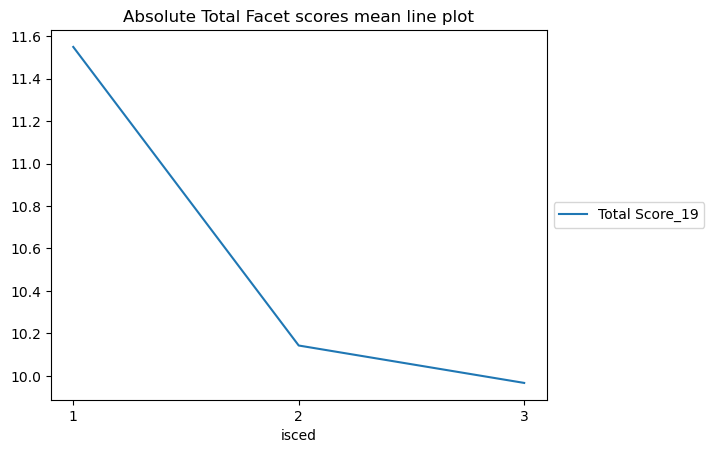

In [66]:
# Absolute Total Facet scores mean line plot from low to high education

df5.groupby('isced')[['Total Score_19']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

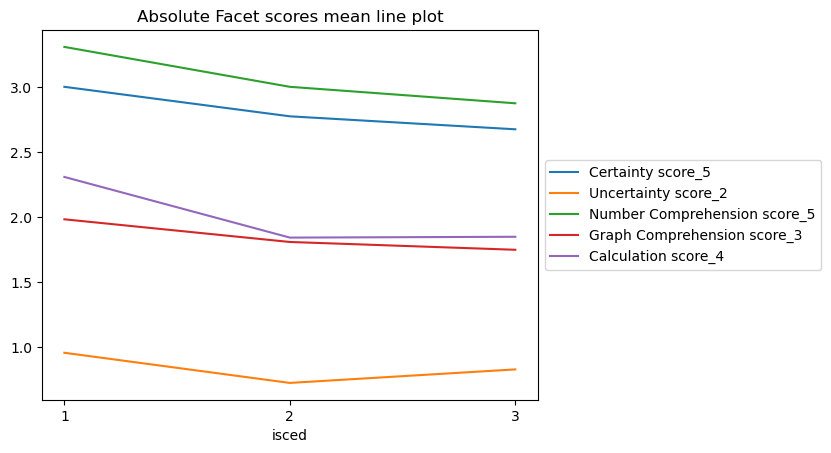

In [67]:
# Absolute Facet scores mean line plot from low to high edu

df5.groupby('isced')[['Certainty score_5','Uncertainty score_2','Number Comprehension score_5','Graph Comprehension score_3','Calculation score_4']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

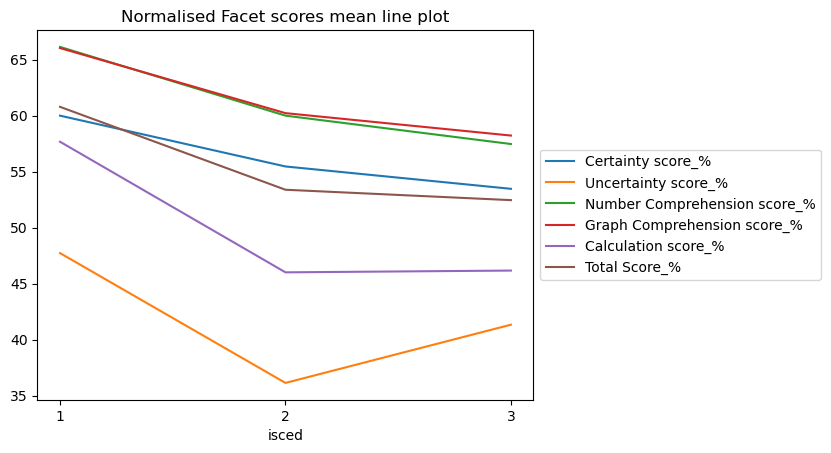

In [68]:
# Normalised Facet scores mean line plot from low to high edu


df5.groupby('isced')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

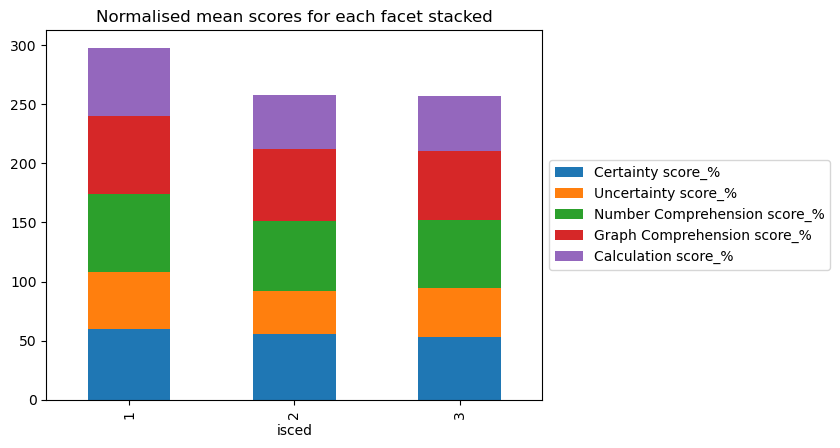

In [69]:
# Normalised mean scores for each facet stacked

df5.groupby('isced')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

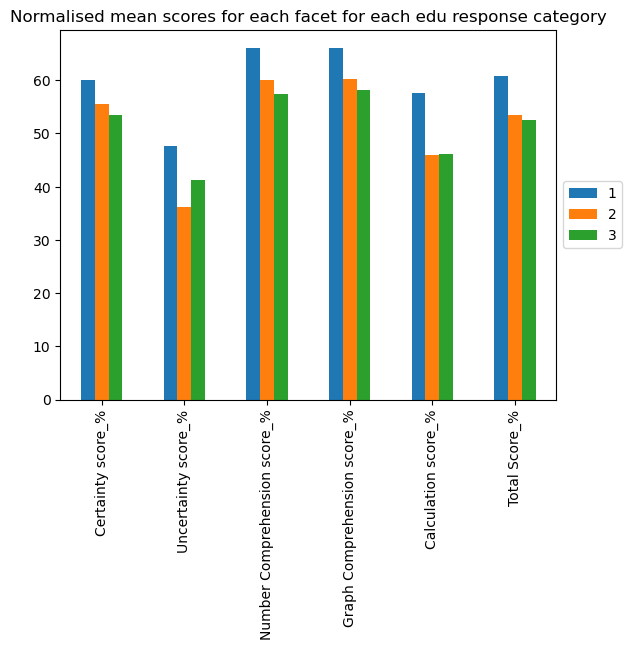

In [70]:
# Normalised mean scores for each facet for each edu response category

df5.groupby('isced')[['Certainty score_%','Uncertainty score_%','Number Comprehension score_%','Graph Comprehension score_%','Calculation score_%','Total Score_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each edu response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='isced', ylabel='Total Score_19'>

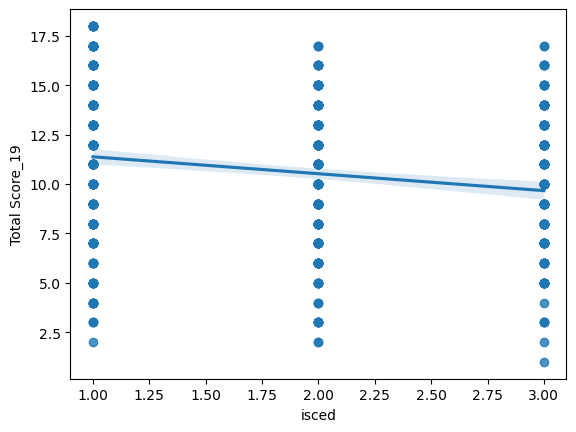

In [71]:
# Trend line for Absolute Total Facet Score vs edu (isced) reponses

sns.regplot (data = df5, x = 'isced', y = 'Total Score_19')

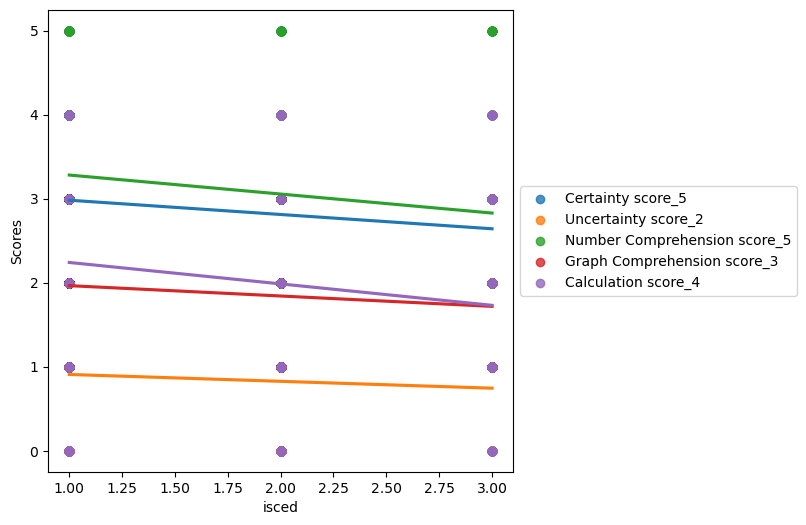

In [72]:
# Trend line for Absolute Independent Facet Score vs edu (isced) reponses

fig, ax6 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df5, x = 'isced', y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax6, label='Certainty score_5')
sns.regplot (data = df5, x = 'isced', y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax6, label='Uncertainty score_2')
sns.regplot (data = df5, x = 'isced', y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax6, label='Number Comprehension score_5')
sns.regplot (data = df5, x = 'isced', y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax6, label='Graph Comprehension score_3')
sns.regplot (data = df5, x = 'isced', y = 'Calculation score_4',fit_reg=True, ci=None, ax=ax6, label='Calculation score_4' )

ax6.set(ylabel='Scores', xlabel='isced')
ax6.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='isced', ylabel='Total Score_19'>

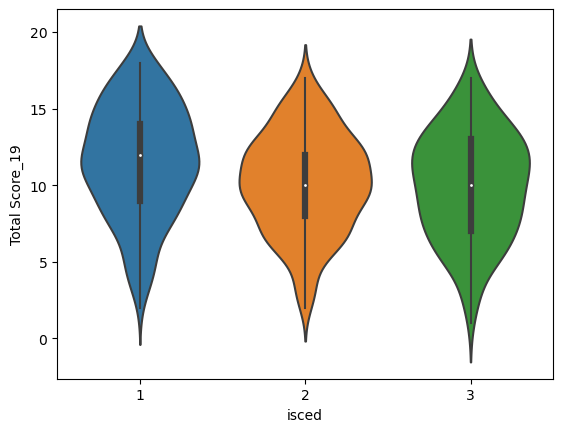

In [73]:
# Violine Plot for Total Score_19 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Total Score_19')

<Axes: xlabel='isced', ylabel='Calculation score_4'>

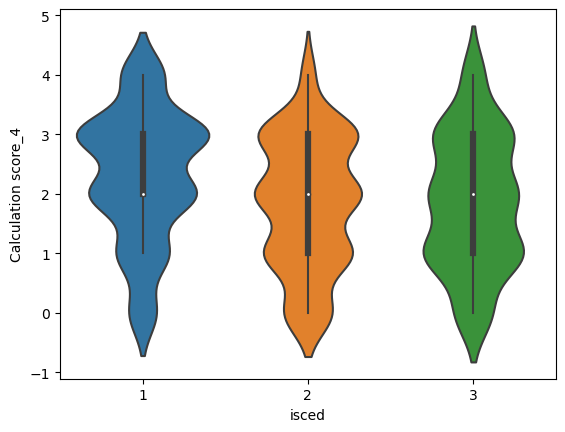

In [74]:
# Violine Plot for Total Score_19 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Calculation score_4')

<Axes: xlabel='isced', ylabel='Graph Comprehension score_3'>

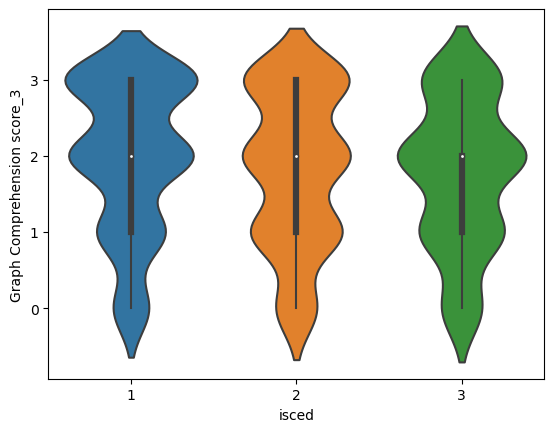

In [75]:
# Violine Plot for Graph Comprehension score_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Graph Comprehension score_3')

<Axes: xlabel='isced', ylabel='Number Comprehension score_5'>

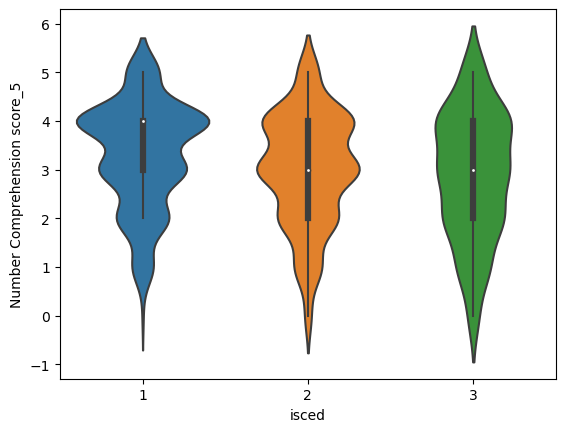

In [76]:
# Violine Plot for Number Comprehension score_5 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Number Comprehension score_5')

<Axes: xlabel='isced', ylabel='Uncertainty score_2'>

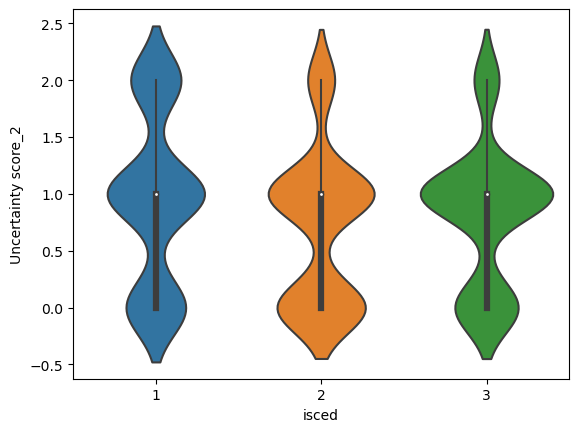

In [77]:
# Violine Plot for Uncertainty score_2 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Uncertainty score_2')

<Axes: xlabel='isced', ylabel='Certainty score_5'>

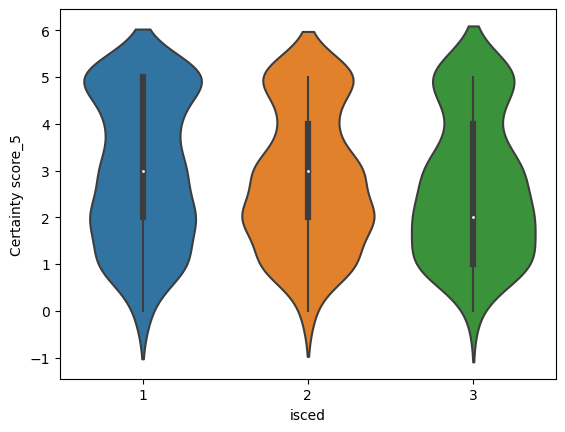

In [78]:
# Violine Plot for Certainty score_5 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Certainty score_5')

In [79]:
# Descriptive stats for the data set, isced = 1
# NA values of wealth are removed

df6 = df5.dropna(axis = 0, subset = 'Q14. Wealth')
df6.drop(df6[df6['Q14. Wealth'] == 3500000].index, inplace = True)
df6.loc[df6['isced']==1][['Q14. Wealth']].describe()

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_8704\3962586432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(df6[df6['Q14. Wealth'] == 3500000].index, inplace = True)


Q14. Wealth
count  1.690000e+02
mean   1.708374e+05
std    2.564941e+05
min    0.000000e+00
25%    5.000000e+03
50%    5.500000e+04
75%    2.500000e+05
max    1.650000e+06

In [80]:
# Descriptive stats for the data set, isced = 2

df6.loc[df6['isced']==2][['Q14. Wealth']].describe()

Q14. Wealth
count  1.360000e+02
mean   1.387606e+05
std    2.632906e+05
min    0.000000e+00
25%    5.000000e+03
50%    3.000000e+04
75%    1.600000e+05
max    1.500000e+06

In [81]:
# Descriptive stats for the data set, isced = 3

df6.loc[df6['isced']==3][['Q14. Wealth']].describe()

Q14. Wealth
count  7.400000e+01
mean   9.383407e+04
std    2.127450e+05
min    0.000000e+00
25%    1.000000e+03
50%    1.000000e+04
75%    4.875000e+04
max    1.350000e+06

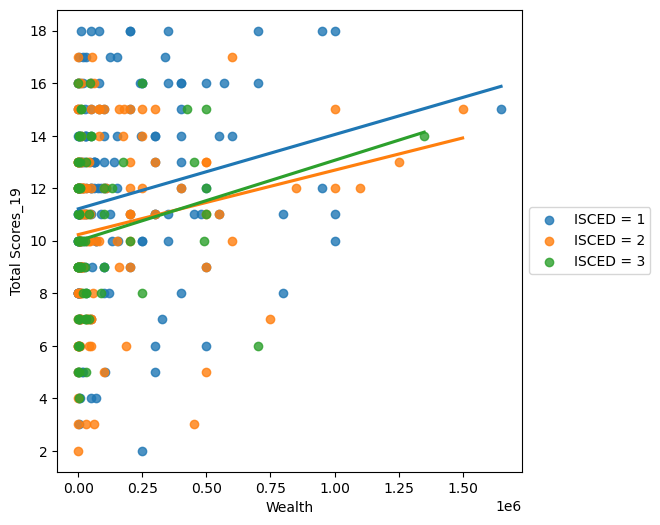

In [82]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['Q14. Wealth'], y = 'Total Score_19', fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['Q14. Wealth'], y = 'Total Score_19', fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['Q14. Wealth'], y = 'Total Score_19', fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='Wealth')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

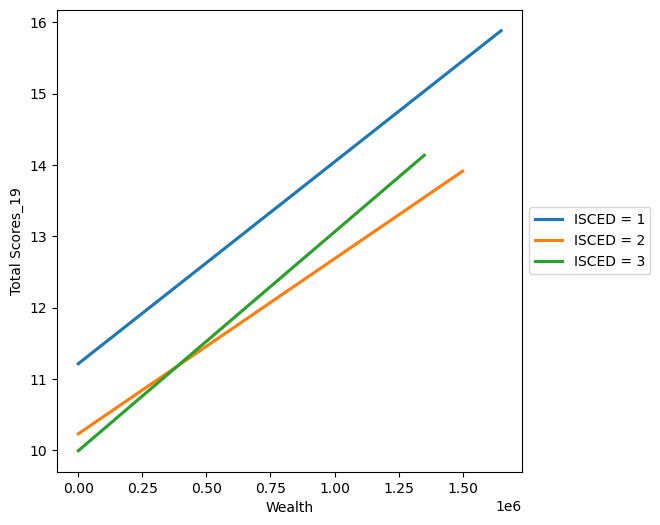

In [83]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['Q14. Wealth'], y = 'Total Score_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['Q14. Wealth'], y = 'Total Score_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['Q14. Wealth'], y = 'Total Score_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='Wealth')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

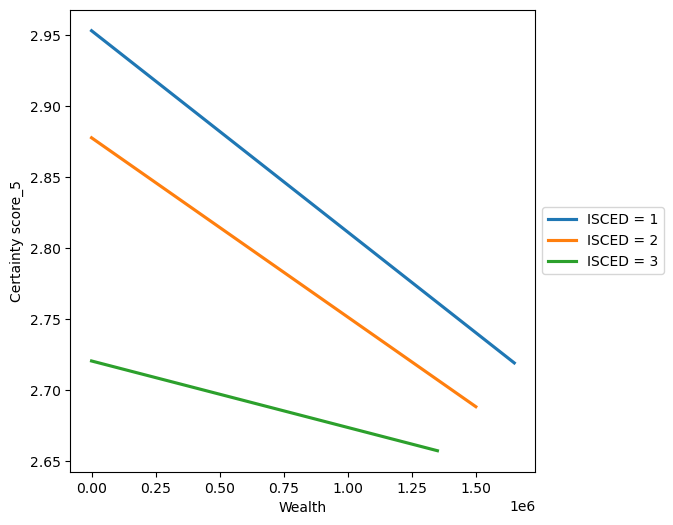

In [84]:
# Trend line for Absolute Certainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['Q14. Wealth'], y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['Q14. Wealth'], y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['Q14. Wealth'], y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty score_5', xlabel='Wealth')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

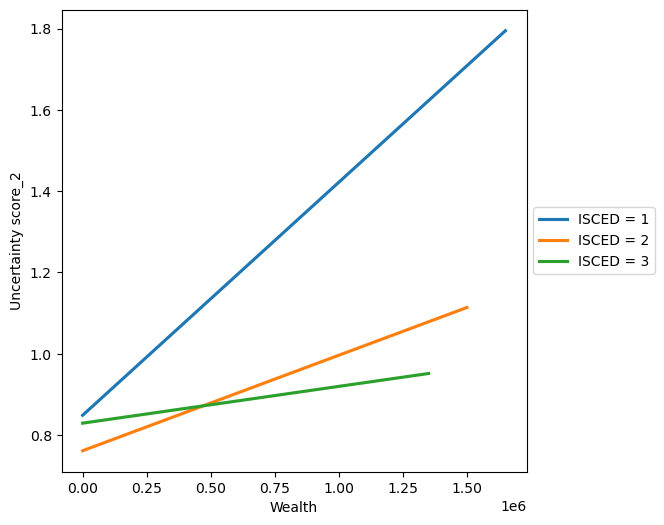

In [85]:
# Trend line for Absolute Uncertainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['Q14. Wealth'], y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['Q14. Wealth'], y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['Q14. Wealth'], y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='Uncertainty score_2', xlabel='Wealth')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

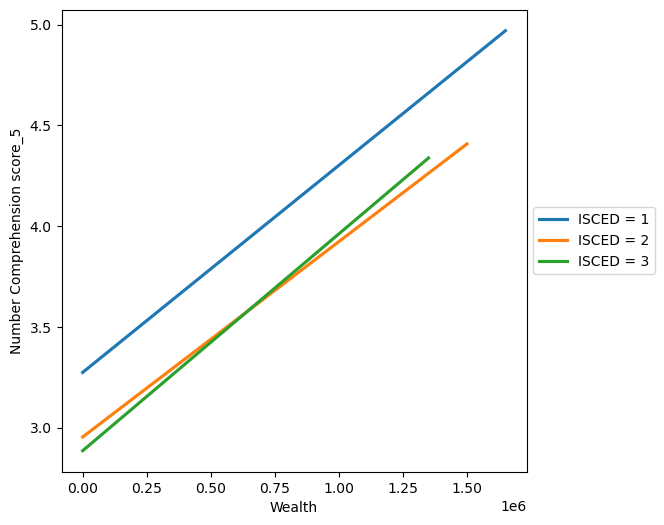

In [86]:
# Trend line for Absolute Number Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['Q14. Wealth'], y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['Q14. Wealth'], y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['Q14. Wealth'], y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Number Comprehension score_5', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

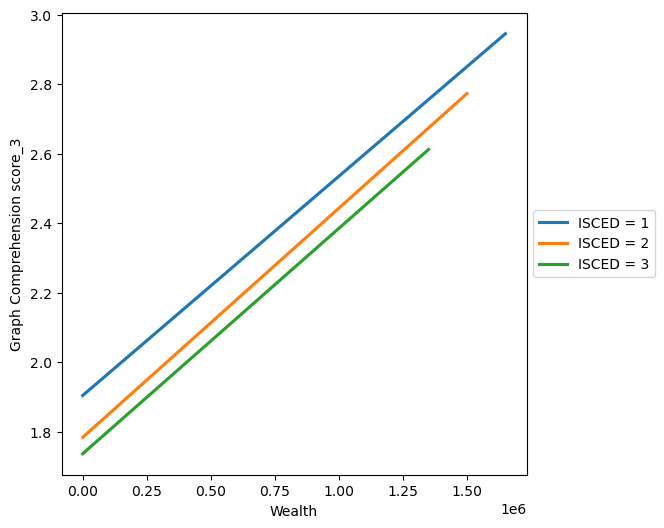

In [87]:
# Trend line for Absolute Graph Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['Q14. Wealth'], y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['Q14. Wealth'], y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['Q14. Wealth'], y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Graph Comprehension score_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

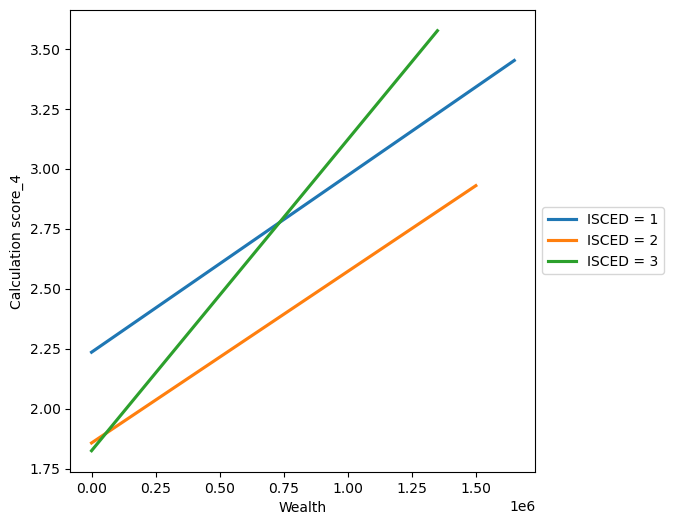

In [88]:
# Trend line for Absolute Calculation Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['Q14. Wealth'], y = 'Calculation score_4', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['Q14. Wealth'], y = 'Calculation score_4', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['Q14. Wealth'], y = 'Calculation score_4', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Calculation score_4', xlabel='Wealth')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [89]:
# Descriptive stats for the data set, isced = 1
# NA values of income are removed

df7 = df5
df7.drop(df7[df7['Q12. Income'] == 7].index, inplace = True)

df7.loc[df7['isced']==1].describe()

responseid  Q12. Income   Q14. Wealth  isced         age     age_rec  \
count    240.000000   240.000000  1.660000e+02  240.0  240.000000  240.000000   
mean    7076.962500     3.704167  1.901598e+05    1.0   44.220833    2.833333   
std     4216.886542     1.628712  3.650422e+05    0.0   15.257524    0.763534   
min        1.000000     1.000000  0.000000e+00    1.0   18.000000    2.000000   
25%     5463.750000     2.000000  5.000000e+03    1.0   31.000000    2.000000   
50%     7312.000000     4.000000  5.250000e+04    1.0   41.000000    3.000000   
75%    10478.500000     5.000000  2.500000e+05    1.0   59.000000    3.000000   
max    13542.000000     6.000000  3.500000e+06    1.0   75.000000    4.000000   

       Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
count         240.000000           240.000000                      240.0000   
mean            3.016667             0.950000                        3.3125   
std             1.563085             0.730106                        1.0969   
min             0.000000             0.000000                        0.0000   
25%             2.000000             0.000000                        3.0000   
50%             3.000000             1.000000                        4.0000   
75%             5.000000             1.000000                        4.0000   
max             5.000000             2.000000                        5.0000   

       Graph Comprehension score_3  Calculation score_4  Total Score_19  \
count                   240.000000           240.000000      240.000000   
mean                      1.979167             2.325000       11.583333   
std                       0.978633             1.079768        3.654729   
min                       0.000000             0.000000        2.000000   
25%                       1.000000             2.000000        9.000000   
50%                       2.000000             2.000000       12.000000   
75%                       3.000000             3.000000       14.000000   
max                       3.000000             4.000000       18.000000   

       Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
count         240.000000           240.000000                    240.000000   
mean           60.333333            47.500000                     66.250000   
std            31.261706            36.505287                     21.938007   
min             0.000000             0.000000                      0.000000   
25%            40.000000             0.000000                     60.000000   
50%            60.000000            50.000000                     80.000000   
75%           100.000000            50.000000                     80.000000   
max           100.000000           100.000000                    100.000000   

       Graph Comprehension score_%  Calculation score_%  Total Score_%  
count                   240.000000           240.000000     240.000000  
mean                     65.972222            58.125000      60.964912  
std                      32.621110            26.994207      19.235415  
min                       0.000000             0.000000      10.526316  
25%                      33.333333            50.000000      47.368421  
50%                      66.666667            50.000000      63.157895  
75%                     100.000000            75.000000      73.684211  
max                     100.000000           100.000000      94.736842

In [90]:
df7.loc[df7['isced']==2].describe()

responseid  Q12. Income   Q14. Wealth  isced         age     age_rec  \
count    211.000000   211.000000  1.330000e+02  211.0  211.000000  211.000000   
mean    7491.421801     3.175355  1.305748e+05    2.0   44.516588    2.810427   
std     4805.917560     1.398148  2.377201e+05    0.0   14.310950    0.705141   
min       15.000000     1.000000  0.000000e+00    2.0   18.000000    2.000000   
25%     2308.500000     2.000000  5.000000e+03    2.0   31.500000    2.000000   
50%     8019.000000     3.000000  3.000000e+04    2.0   44.000000    3.000000   
75%    11703.000000     4.000000  1.600000e+05    2.0   56.000000    3.000000   
max    15717.000000     6.000000  1.250000e+06    2.0   74.000000    4.000000   

       Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
count         211.000000           211.000000                    211.000000   
mean            2.843602             0.725118                      2.962085   
std             1.482981             0.676324                      1.154075   
min             0.000000             0.000000                      0.000000   
25%             2.000000             0.000000                      2.000000   
50%             3.000000             1.000000                      3.000000   
75%             4.000000             1.000000                      4.000000   
max             5.000000             2.000000                      5.000000   

       Graph Comprehension score_3  Calculation score_4  Total Score_19  \
count                   211.000000           211.000000      211.000000   
mean                      1.791469             1.834123       10.156398   
std                       1.006703             1.123757        3.296346   
min                       0.000000             0.000000        2.000000   
25%                       1.000000             1.000000        8.000000   
50%                       2.000000             2.000000       10.000000   
75%                       3.000000             3.000000       13.000000   
max                       3.000000             4.000000       17.000000   

       Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
count         211.000000           211.000000                    211.000000   
mean           56.872038            36.255924                     59.241706   
std            29.659620            33.816182                     23.081499   
min             0.000000             0.000000                      0.000000   
25%            40.000000             0.000000                     40.000000   
50%            60.000000            50.000000                     60.000000   
75%            80.000000            50.000000                     80.000000   
max           100.000000           100.000000                    100.000000   

       Graph Comprehension score_%  Calculation score_%  Total Score_%  
count                   211.000000           211.000000     211.000000  
mean                     59.715640            45.853081      53.454727  
std                      33.556763            28.093928      17.349191  
min                       0.000000             0.000000      10.526316  
25%                      33.333333            25.000000      42.105263  
50%                      66.666667            50.000000      52.631579  
75%                     100.000000            75.000000      68.421053  
max                     100.000000           100.000000      89.473684

In [91]:
df7.loc[df7['isced']==3].describe()

responseid  Q12. Income   Q14. Wealth  isced         age     age_rec  \
count    126.000000   126.000000  7.400000e+01  126.0  126.000000  126.000000   
mean    1647.952381     2.619048  9.383407e+04    3.0   51.817460    3.158730   
std     2500.040370     1.563878  2.127450e+05    0.0   13.992799    0.742026   
min       12.000000     1.000000  0.000000e+00    3.0   20.000000    2.000000   
25%      493.250000     1.000000  1.000000e+03    3.0   43.250000    3.000000   
50%      786.000000     2.000000  1.000000e+04    3.0   51.500000    3.000000   
75%     1268.500000     3.000000  4.875000e+04    3.0   63.000000    4.000000   
max    10820.000000     6.000000  1.350000e+06    3.0   75.000000    4.000000   

       Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
count         126.000000           126.000000                    126.000000   
mean            2.650794             0.841270                      2.896825   
std             1.493010             0.598835                      1.313495   
min             0.000000             0.000000                      0.000000   
25%             1.000000             0.000000                      2.000000   
50%             2.000000             1.000000                      3.000000   
75%             4.000000             1.000000                      4.000000   
max             5.000000             2.000000                      5.000000   

       Graph Comprehension score_3  Calculation score_4  Total Score_19  \
count                   126.000000           126.000000      126.000000   
mean                      1.793651             1.944444       10.126984   
std                       0.940787             1.119325        3.445540   
min                       0.000000             0.000000        1.000000   
25%                       1.000000             1.000000        8.000000   
50%                       2.000000             2.000000       10.000000   
75%                       3.000000             3.000000       13.000000   
max                       3.000000             4.000000       17.000000   

       Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
count         126.000000           126.000000                    126.000000   
mean           53.015873            42.063492                     57.936508   
std            29.860203            29.941742                     26.269906   
min             0.000000             0.000000                      0.000000   
25%            20.000000             0.000000                     40.000000   
50%            40.000000            50.000000                     60.000000   
75%            80.000000            50.000000                     80.000000   
max           100.000000           100.000000                    100.000000   

       Graph Comprehension score_%  Calculation score_%  Total Score_%  
count                   126.000000           126.000000     126.000000  
mean                     59.788360            48.611111      53.299916  
std                      31.359552            27.983130      18.134421  
min                       0.000000             0.000000       5.263158  
25%                      33.333333            25.000000      42.105263  
50%                      66.666667            50.000000      52.631579  
75%                     100.000000            75.000000      68.421053  
max                     100.000000           100.000000      89.473684

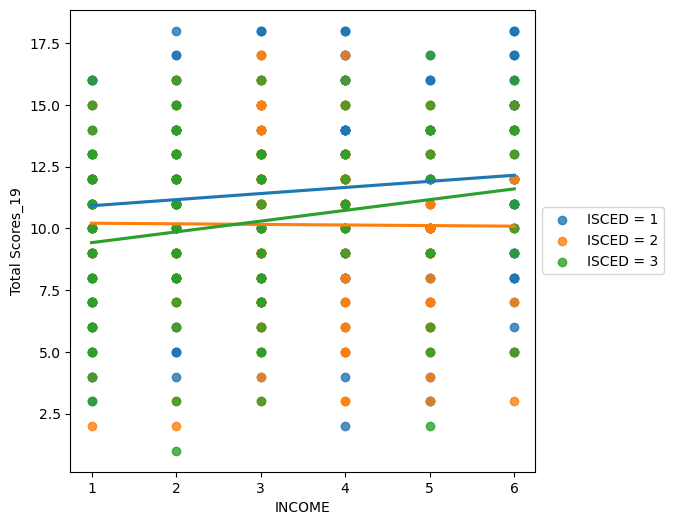

In [92]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[df7['isced']==1]['Total Score_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[df7['isced']==2]['Total Score_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[df7['isced']==3]['Total Score_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='INCOME')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

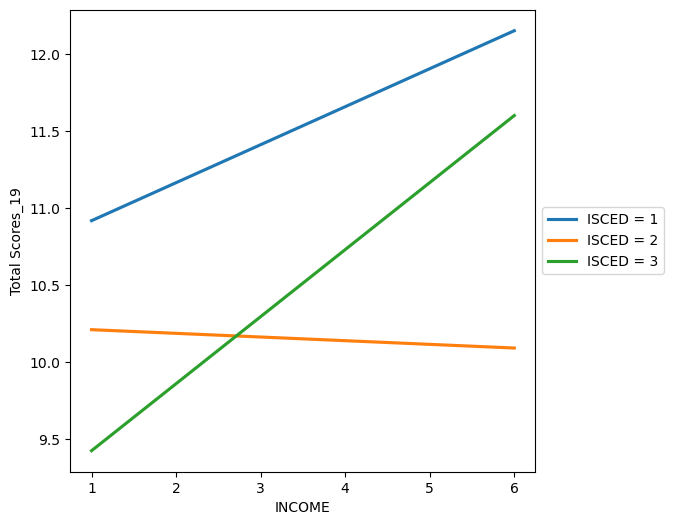

In [93]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'Q12. Income', y = 'Total Score_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'Q12. Income', y = 'Total Score_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'Q12. Income', y = 'Total Score_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='INCOME')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

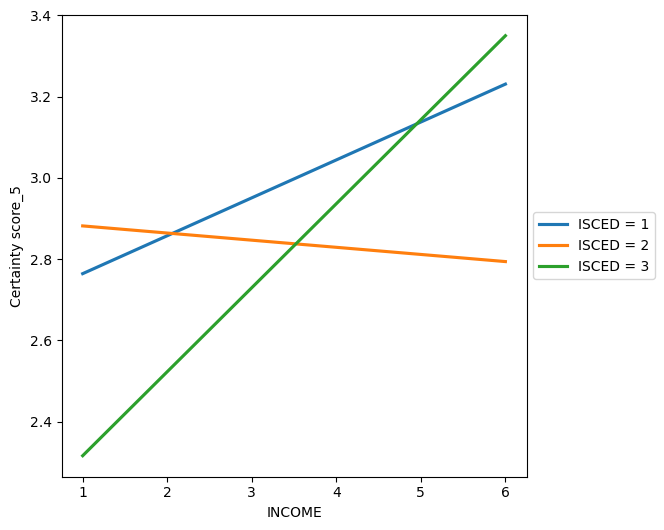

In [94]:
# Trend line for Absolute Certainty Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'Q12. Income', y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'Q12. Income', y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'Q12. Income', y = 'Certainty score_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty score_5', xlabel='INCOME')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

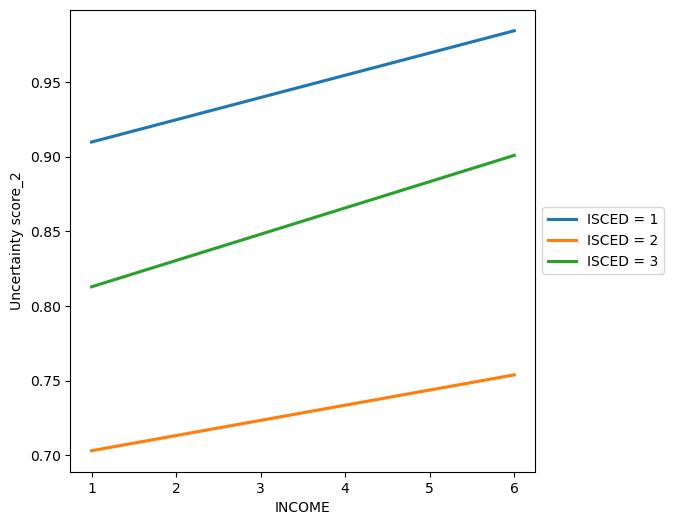

In [95]:
# Trend line for Absolute Uncertainty Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'Q12. Income', y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'Q12. Income', y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'Q12. Income', y = 'Uncertainty score_2', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='Uncertainty score_2', xlabel='INCOME')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

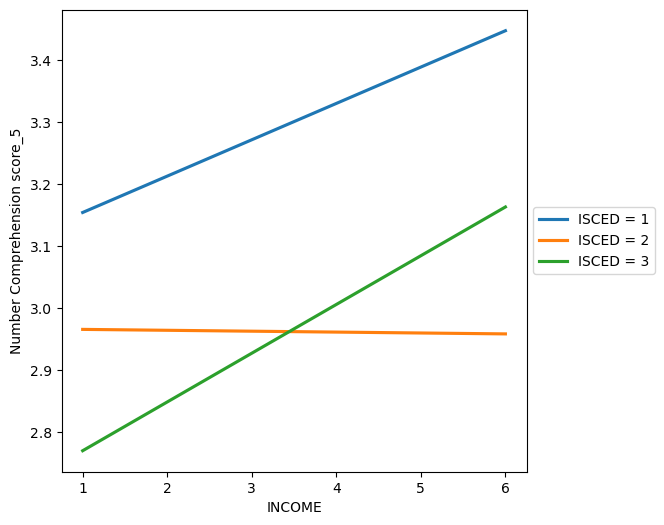

In [96]:
# Trend line for Absolute Number Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'Q12. Income', y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'Q12. Income', y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'Q12. Income', y = 'Number Comprehension score_5', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Number Comprehension score_5', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

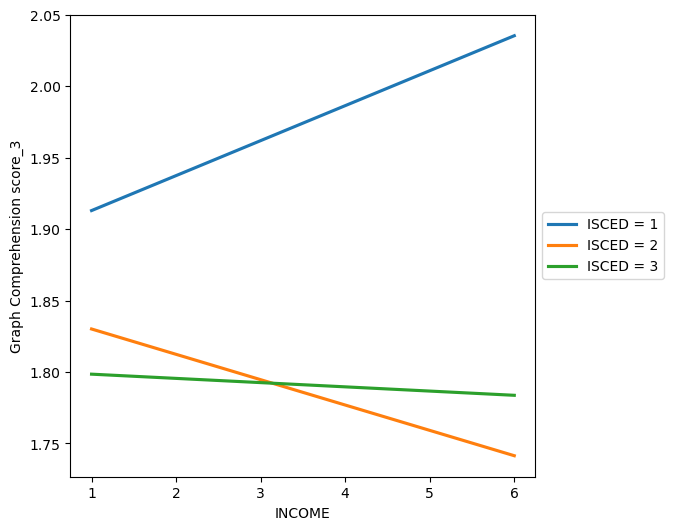

In [97]:
# Trend line for Absolute Graph Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'Q12. Income', y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'Q12. Income', y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'Q12. Income', y = 'Graph Comprehension score_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Graph Comprehension score_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

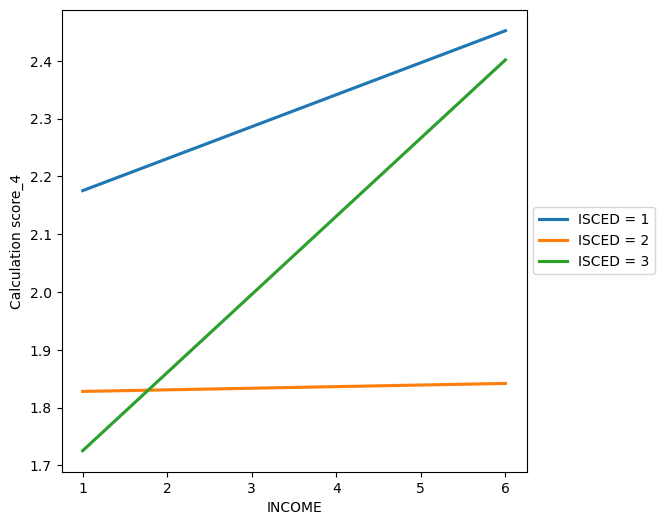

In [98]:
# Trend line for Absolute Calculation Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'Q12. Income', y = 'Calculation score_4', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'Q12. Income', y = 'Calculation score_4', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'Q12. Income', y = 'Calculation score_4', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Calculation score_4', xlabel='INCOME')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [99]:
df7

responseid  Q12. Income  Q14. Wealth  isced  age  age_rec  \
0          6873            6          NaN      1   25        2   
1          7875            5          NaN      1   63        4   
2          7876            6      25000.0      1   41        3   
4          7884            6     950000.0      1   52        3   
5          8688            3     155000.0      1   50        3   
..          ...          ...          ...    ...  ...      ...   
645         115            2     100000.0      3   49        3   
646         104            1       1000.0      3   67        4   
647          78            1          NaN      3   51        3   
648        6130            1          NaN      3   32        2   
651         405            2          NaN      3   48        3   

     Certainty score_5  Uncertainty score_2  Number Comprehension score_5  \
0                    1                    1                             2   
1                    1                    1                             3   
2                    3                    2                             4   
4                    5                    2                             5   
5                    4                    0                             4   
..                 ...                  ...                           ...   
645                  2                    1                             3   
646                  1                    0                             3   
647                  2                    2                             5   
648                  2                    0                             2   
651                  5                    0                             4   

     Graph Comprehension score_3  Calculation score_4  Total Score_19  \
0                              1                    1               6   
1                              2                    2               9   
2                              3                    3              15   
4                              2                    4              18   
5                              1                    1              10   
..                           ...                  ...             ...   
645                            1                    2               9   
646                            0                    1               5   
647                            3                    2              14   
648                            1                    0               5   
651                            1                    2              12   

     Certainty score_%  Uncertainty score_%  Number Comprehension score_%  \
0                   20                   50                            40   
1                   20                   50                            60   
2                   60                  100                            80   
4                  100                  100                           100   
5                   80                    0                            80   
..                 ...                  ...                           ...   
645                 40                   50                            60   
646                 20                    0                            60   
647                 40                  100                           100   
648                 40                    0                            40   
651                100                    0                            80   

     Graph Comprehension score_%  Calculation score_%  Total Score_%  
0                      33.333333                   25      31.578947  
1                      66.666667                   50      47.368421  
2                     100.000000                   75      78.947368  
4                      66.666667                  100      94.736842  
5                      33.333333                   25      52.631579  
..                           ...                  ...      

In [100]:
# Since we already have a classification for Age groups in the form of age_rec, we will use that.
# We will also use median of age to see if it yields any relevant results, as instructed.

# AXES to be used = Age or age groups, ISCED, Income

# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)



In [101]:
df7.loc[(df7['age_rec']==2)].describe()

responseid  Q12. Income    Q14. Wealth       isced         age  \
count    195.000000   195.000000     122.000000  195.000000  195.000000   
mean    9526.461538     3.164103   47579.500000    1.656410   29.225641   
std     4751.872248     1.503859  104410.492785    0.703377    4.042348   
min      263.000000     1.000000       0.000000    1.000000   18.000000   
25%     5810.500000     2.000000    1000.000000    1.000000   26.000000   
50%    11870.000000     3.000000    5500.000000    2.000000   30.000000   
75%    13450.000000     4.000000   50000.000000    2.000000   32.000000   
max    15717.000000     6.000000  800000.000000    3.000000   35.000000   

       age_rec  Certainty score_5  Uncertainty score_2  \
count    195.0         195.000000           195.000000   
mean       2.0           2.800000             0.620513   
std        0.0           1.648492             0.688334   
min        2.0           0.000000             0.000000   
25%        2.0           1.000000             0.000000   
50%        2.0           3.000000             1.000000   
75%        2.0           4.500000             1.000000   
max        2.0           5.000000             2.000000   

       Number Comprehension score_5  Graph Comprehension score_3  \
count                    195.000000                   195.000000   
mean                       2.774359                     1.558974   
std                        1.148894                     1.015528   
min                        0.000000                     0.000000   
25%                        2.000000                     1.000000   
50%                        3.000000                     2.000000   
75%                        4.000000                     2.000000   
max                        5.000000                     3.000000   

       Calculation score_4  Total Score_19  Certainty score_%  \
count           195.000000      195.000000         195.000000   
mean              1.841026        9.594872          56.000000   
std               1.153372        3.525310          32.969839   
min               0.000000        1.000000           0.000000   
25%               1.000000        7.000000          20.000000   
50%               2.000000       10.000000          60.000000   
75%               3.000000       12.000000          90.000000   
max               4.000000       16.000000         100.000000   

       Uncertainty score_%  Number Comprehension score_%  \
count           195.000000                    195.000000   
mean             31.025641                     55.487179   
std              34.416706                     22.977882   
min               0.000000                      0.000000   
25%               0.000000                     40.000000   
50%              50.000000                     60.000000   
75%              50.000000                     80.000000   
max             100.000000                    100.000000   

       Graph Comprehension score_%  Calculation score_%  Total Score_%  
count                   195.000000           195.000000     195.000000  
mean                     51.965812            46.025641      50.499325  
std                      33.850946            28.834300      18.554262  
min                       0.000000             0.000000       5.263158  
25%                      33.333333            25.000000      36.842105  
50%                      66.666667            50.000000      52.631579  
75%                      66.666667            75.000000      63.157895  
max                     100.000000           100.000000      84.210526

In [102]:
df7.loc[(df7['age_rec']==3)].describe()

responseid  Q12. Income   Q14. Wealth       isced         age  \
count    247.000000   247.000000  1.520000e+02  247.000000  247.000000   
mean    4563.182186     3.578947  1.374157e+05    1.838057   48.105263   
std     3863.130621     1.650586  2.406952e+05    0.758481    6.781510   
min        1.000000     1.000000  0.000000e+00    1.000000   36.000000   
25%      730.000000     2.000000  5.000000e+03    1.000000   42.000000   
50%     5483.000000     3.000000  3.450000e+04    2.000000   48.000000   
75%     7937.500000     5.000000  1.812500e+05    2.000000   54.000000   
max    11536.000000     6.000000  1.650000e+06    3.000000   59.000000   

       age_rec  Certainty score_5  Uncertainty score_2  \
count    247.0         247.000000           247.000000   
mean       3.0           3.072874             0.898785   
std        0.0           1.468765             0.693962   
min        3.0           0.000000             0.000000   
25%        3.0           2.000000             0.000000   
50%        3.0           3.000000             1.000000   
75%        3.0           5.000000             1.000000   
max        3.0           5.000000             2.000000   

       Number Comprehension score_5  Graph Comprehension score_3  \
count                    247.000000                   247.000000   
mean                       3.190283                     2.020243   
std                        1.137063                     0.934651   
min                        0.000000                     0.000000   
25%                        2.000000                     1.000000   
50%                        3.000000                     2.000000   
75%                        4.000000                     3.000000   
max                        5.000000                     3.000000   

       Calculation score_4  Total Score_19  Certainty score_%  \
count           247.000000      247.000000         247.000000   
mean              2.105263       11.287449          61.457490   
std               1.073069        3.382518          29.375291   
min               0.000000        2.000000           0.000000   
25%               1.000000        9.000000          40.000000   
50%               2.000000       11.000000          60.000000   
75%               3.000000       14.000000         100.000000   
max               4.000000       18.000000         100.000000   

       Uncertainty score_%  Number Comprehension score_%  \
count           247.000000                    247.000000   
mean             44.939271                     63.805668   
std              34.698123                     22.741269   
min               0.000000                      0.000000   
25%               0.000000                     40.000000   
50%              50.000000                     60.000000   
75%              50.000000                     80.000000   
max             100.000000                    100.000000   

       Graph Comprehension score_%  Calculation score_%  Total Score_%  
count                   247.000000           247.000000     247.000000  
mean                     67.341430            52.631579      59.407628  
std                      31.155030            26.826715      17.802726  
min                       0.000000             0.000000      10.526316  
25%                      33.333333            25.000000      47.368421  
50%                      66.666667            50.000000      57.894737  
75%                     100.000000            75.000000      73.684211  
max                     100.000000           100.000000      94.736842

In [103]:
df7.loc[(df7['age_rec']==4)].describe()

responseid  Q12. Income   Q14. Wealth       isced         age  \
count    135.000000   135.000000  9.900000e+01  135.000000  135.000000   
mean    3718.792593     2.874074  2.947959e+05    1.948148   66.325926   
std     3146.240925     1.483389  4.501179e+05    0.857961    4.221179   
min       15.000000     1.000000  0.000000e+00    1.000000   60.000000   
25%      695.000000     2.000000  1.850000e+04    1.000000   62.500000   
50%     2307.000000     3.000000  1.000000e+05    2.000000   67.000000   
75%     6230.000000     4.000000  4.850000e+05    3.000000   69.000000   
max    14274.000000     6.000000  3.500000e+06    3.000000   75.000000   

       age_rec  Certainty score_5  Uncertainty score_2  \
count    135.0         135.000000           135.000000   
mean       4.0           2.614815             1.066667   
std        0.0           1.387498             0.588446   
min        4.0           1.000000             0.000000   
25%        4.0           1.500000             1.000000   
50%        4.0           2.000000             1.000000   
75%        4.0           3.000000             1.000000   
max        4.0           5.000000             2.000000   

       Number Comprehension score_5  Graph Comprehension score_3  \
count                    135.000000                   135.000000   
mean                       3.377778                     2.044444   
std                        1.208593                     0.921280   
min                        0.000000                     0.000000   
25%                        3.000000                     1.500000   
50%                        4.000000                     2.000000   
75%                        4.000000                     3.000000   
max                        5.000000                     3.000000   

       Calculation score_4  Total Score_19  Certainty score_%  \
count           135.000000      135.000000         135.000000   
mean              2.303704       11.407407          52.296296   
std               1.128161        3.490491          27.749969   
min               0.000000        2.000000          20.000000   
25%               1.500000        9.000000          30.000000   
50%               2.000000       12.000000          40.000000   
75%               3.000000       14.000000          60.000000   
max               4.000000       18.000000         100.000000   

       Uncertainty score_%  Number Comprehension score_%  \
count           135.000000                    135.000000   
mean             53.333333                     67.555556   
std              29.422298                     24.171856   
min               0.000000                      0.000000   
25%              50.000000                     60.000000   
50%              50.000000                     80.000000   
75%              50.000000                     80.000000   
max             100.000000                    100.000000   

       Graph Comprehension score_%  Calculation score_%  Total Score_%  
count                   135.000000           135.000000     135.000000  
mean                     68.148148            57.592593      60.038986  
std                      30.709322            28.204026      18.371005  
min                       0.000000             0.000000      10.526316  
25%                      50.000000            37.500000      47.368421  
50%                      66.666667            50.000000      63.157895  
75%                     100.000000            75.000000      73.684211  
max                     100.000000           100.000000      94.736842

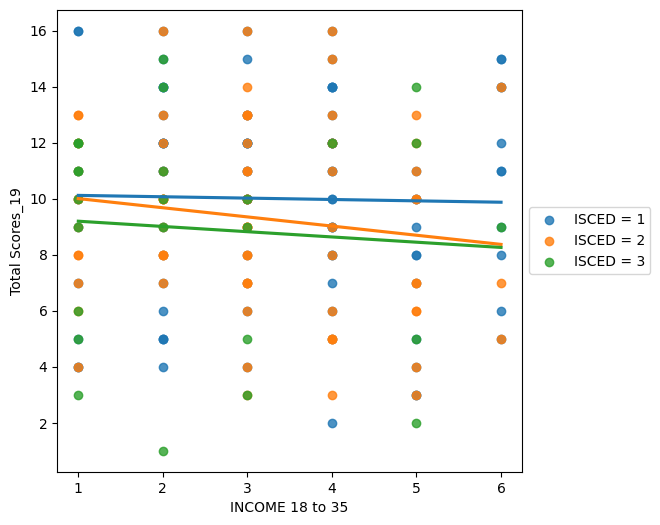

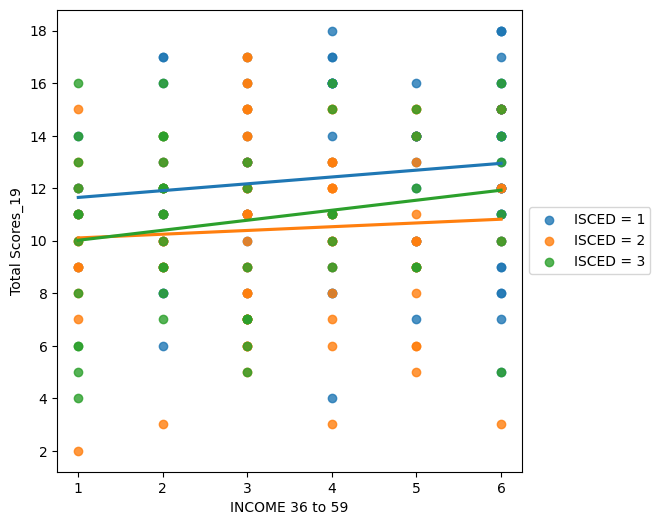

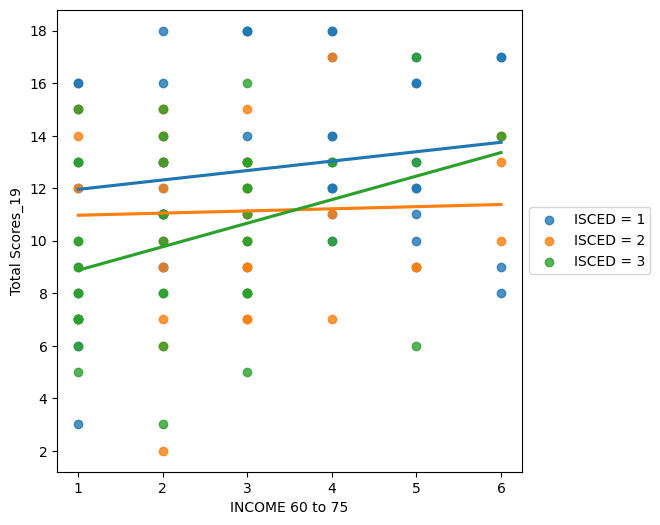

In [104]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='INCOME 18 to 35')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='INCOME 36 to 59')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_19', xlabel='INCOME 60 to 75')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

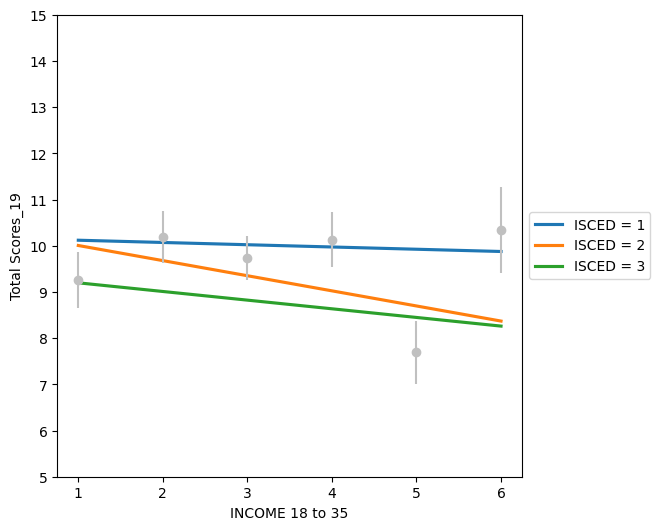

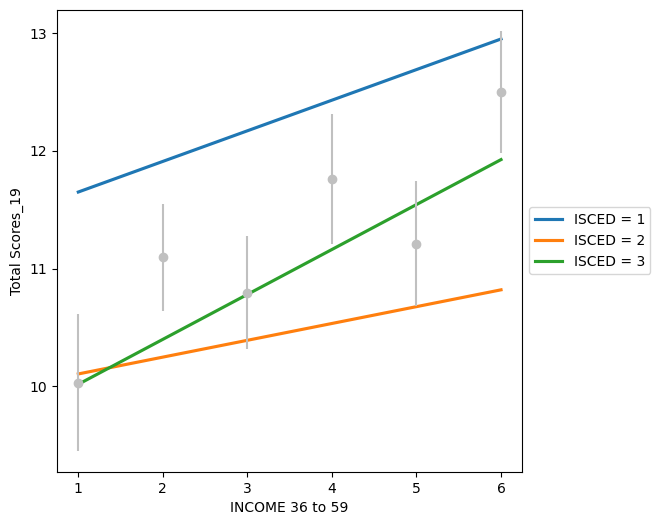

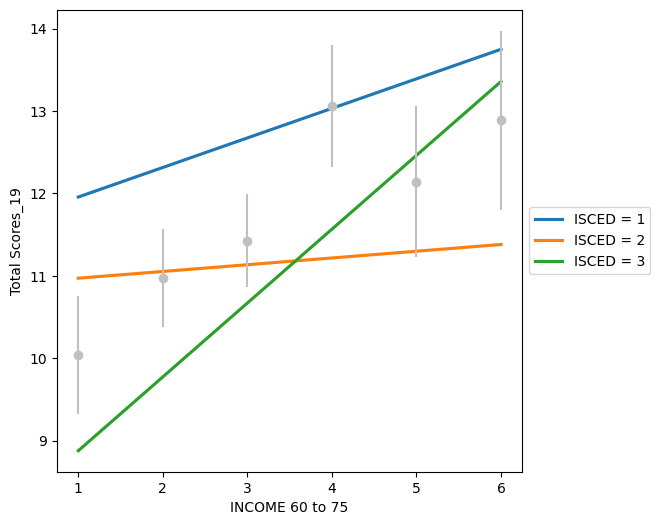

In [105]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['Q12. Income']).mean()['Total Score_19'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['Q12. Income']).sem(ddof = 1)['Total Score_19'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='INCOME 18 to 35',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='INCOME 36 to 59',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['Q12. Income']).mean()['Total Score_19'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['Q12. Income']).sem()['Total Score_19'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_19', xlabel='INCOME 60 to 75',  yticks = np.arange(5, 16 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['Q12. Income']).mean()['Total Score_19'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['Q12. Income']).sem()['Total Score_19'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

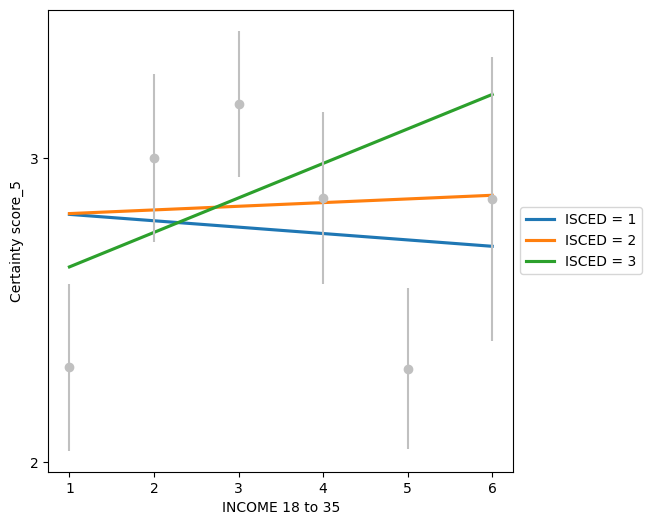

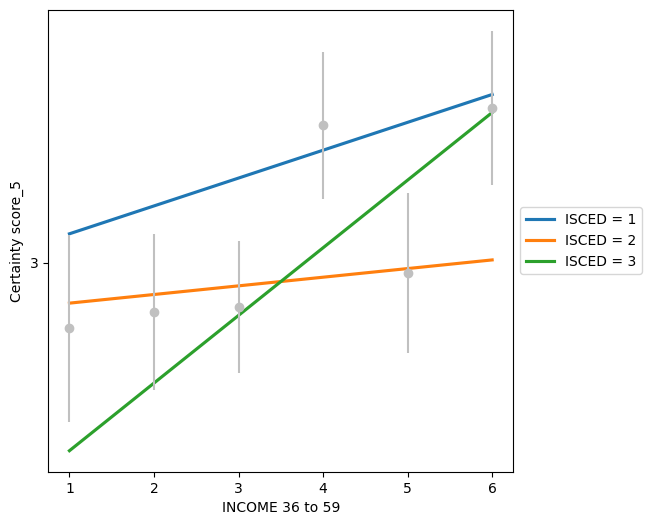

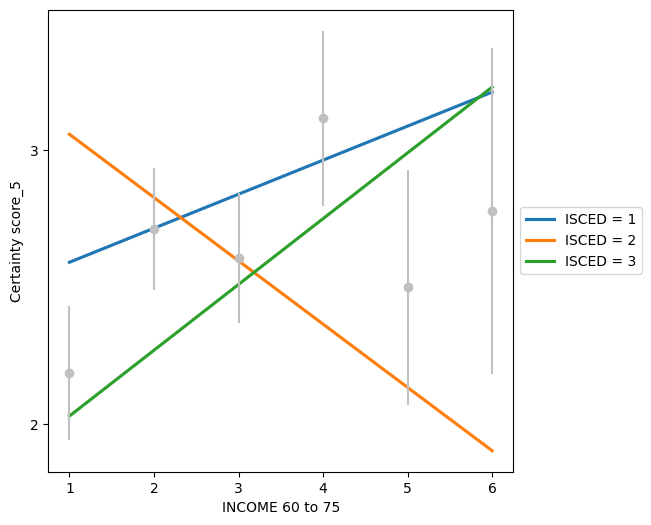

In [106]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Certainty score_5', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['Q12. Income']).mean()['Certainty score_5'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['Q12. Income']).sem()['Certainty score_5'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Certainty score_5', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['Q12. Income']).mean()['Certainty score_5'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['Q12. Income']).sem()['Certainty score_5'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Certainty score_5', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['Q12. Income']).mean()['Certainty score_5'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['Q12. Income']).sem()['Certainty score_5'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

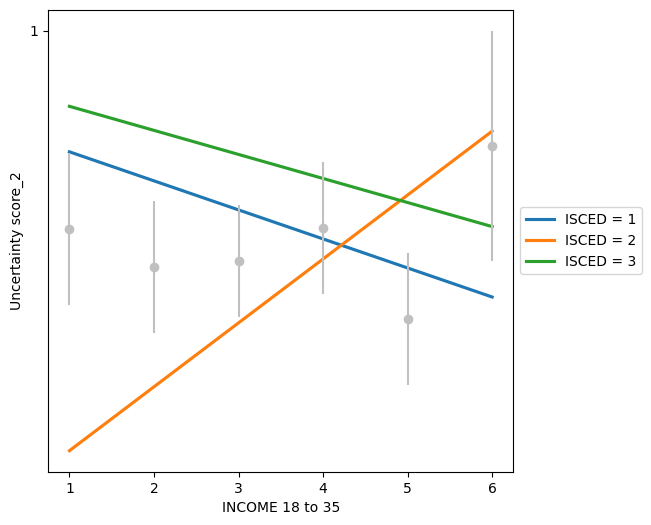

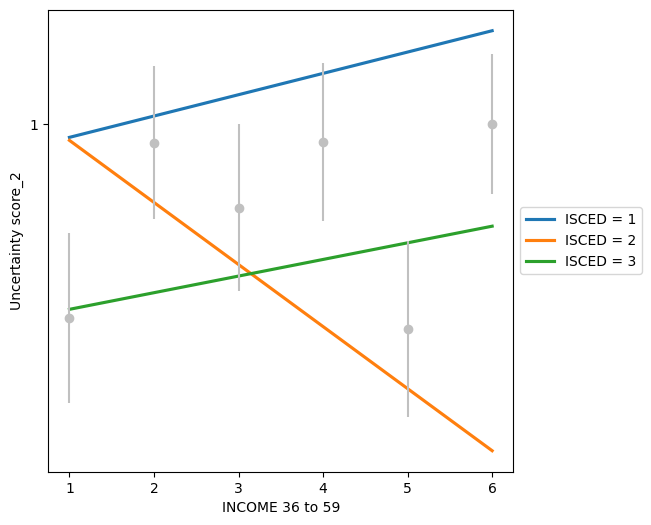

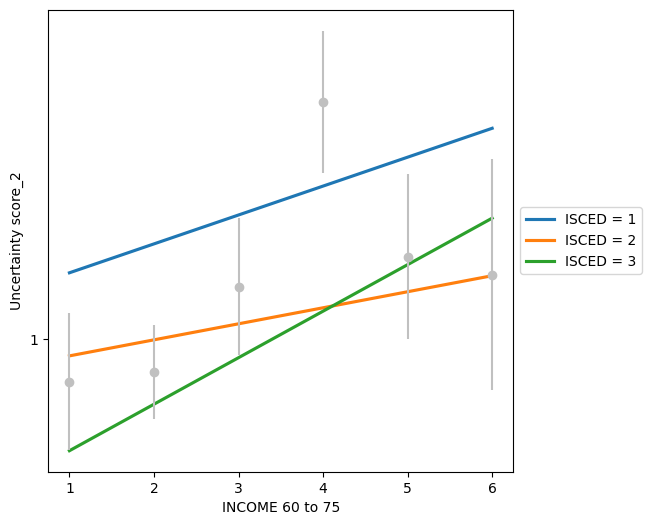

In [107]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Uncertainty score_2', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['Q12. Income']).mean()['Uncertainty score_2'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['Q12. Income']).sem()['Uncertainty score_2'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Uncertainty score_2', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['Q12. Income']).mean()['Uncertainty score_2'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['Q12. Income']).sem()['Uncertainty score_2'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Uncertainty score_2', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 3 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['Q12. Income']).mean()['Uncertainty score_2'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['Q12. Income']).sem()['Uncertainty score_2'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

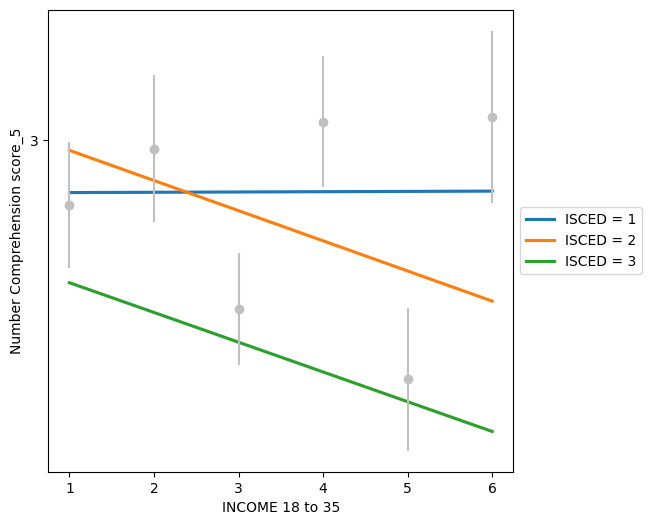

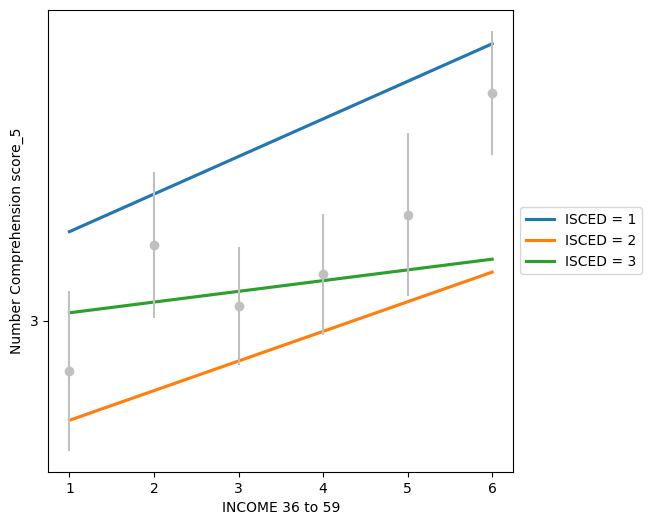

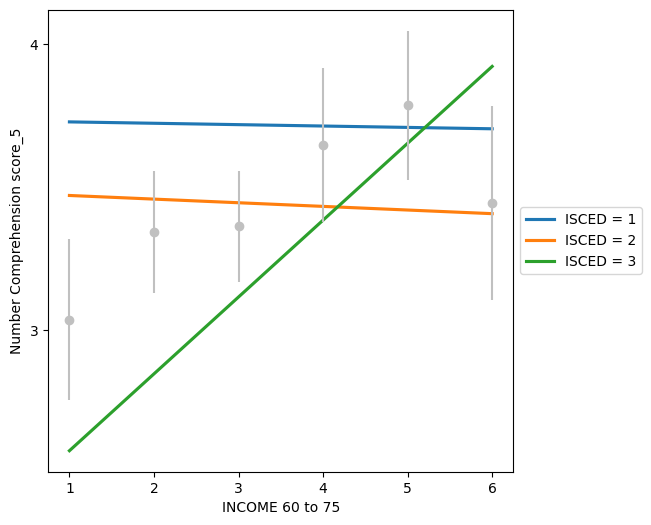

In [108]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Number Comprehension score_5', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['Q12. Income']).mean()['Number Comprehension score_5'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['Q12. Income']).sem()['Number Comprehension score_5'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Number Comprehension score_5', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['Q12. Income']).mean()['Number Comprehension score_5'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['Q12. Income']).sem()['Number Comprehension score_5'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Number Comprehension score_5', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['Q12. Income']).mean()['Number Comprehension score_5'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['Q12. Income']).sem()['Number Comprehension score_5'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

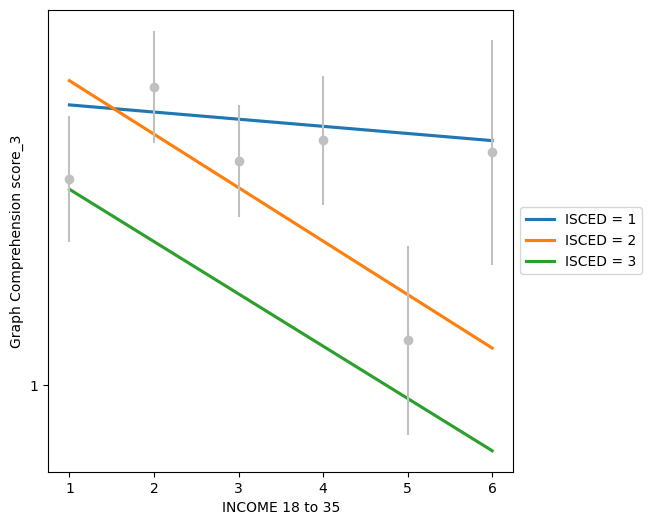

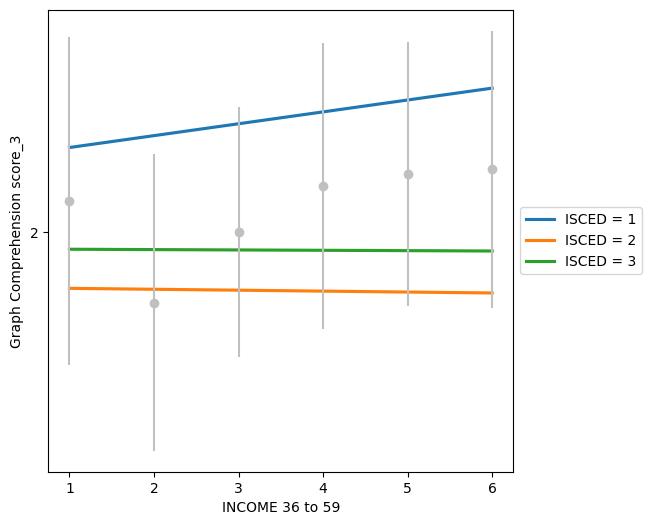

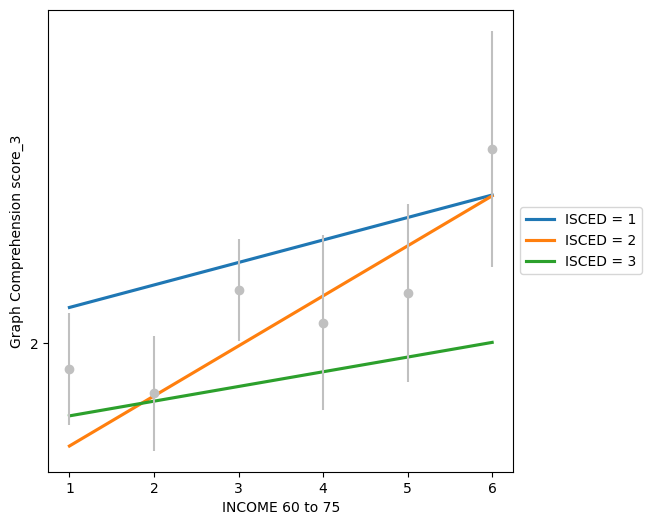

In [109]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Graph Comprehension score_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['Q12. Income']).mean()['Graph Comprehension score_3'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['Q12. Income']).sem()['Graph Comprehension score_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Graph Comprehension score_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['Q12. Income']).mean()['Graph Comprehension score_3'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['Q12. Income']).sem()['Graph Comprehension score_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Graph Comprehension score_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 4 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['Q12. Income']).mean()['Graph Comprehension score_3'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['Q12. Income']).sem()['Graph Comprehension score_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

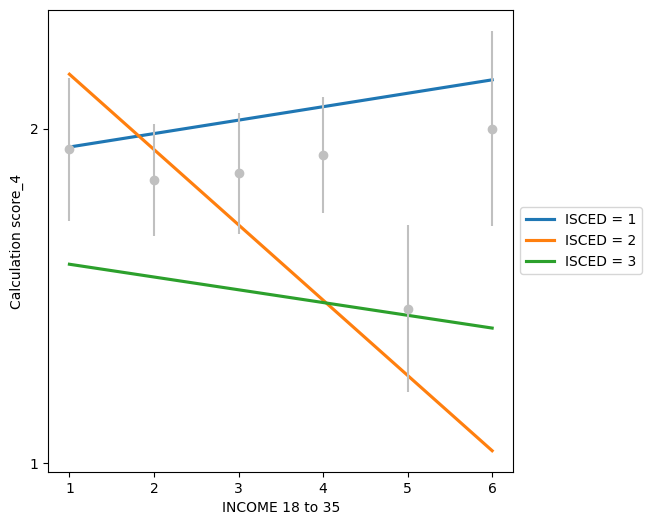

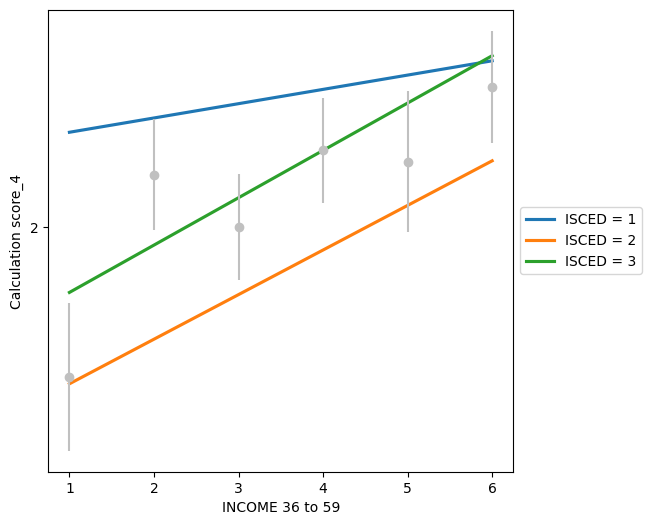

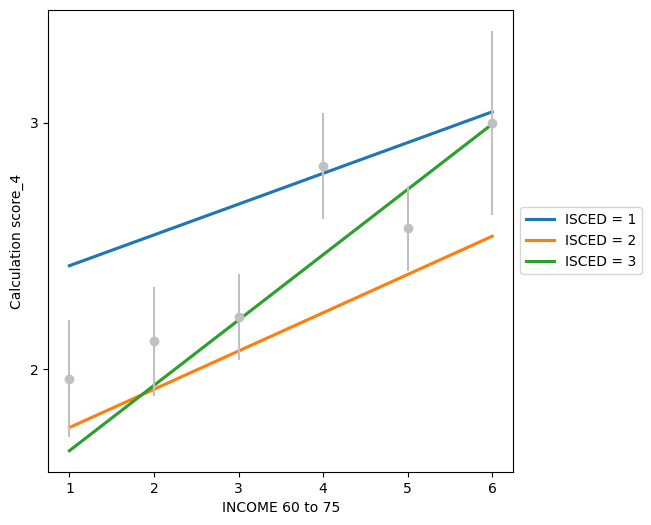

In [110]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Calculation score_4', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['Q12. Income']).mean()['Calculation score_4'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['Q12. Income']).sem()['Calculation score_4'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Calculation score_4', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['Q12. Income']).mean()['Calculation score_4'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['Q12. Income']).sem()['Calculation score_4'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Calculation score_4', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 5 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['Q12. Income']).mean()['Calculation score_4'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['Q12. Income']).sem()['Calculation score_4'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [111]:
# Age median method
# Age_median
age_m = df7['age'].median()
age_m

46.0

In [112]:
df7.loc[(df7['age'] < age_m)].describe()

responseid  Q12. Income    Q14. Wealth       isced         age  \
count    281.000000   281.000000     169.000000  281.000000  281.000000   
mean    8334.572954     3.419929   50636.384615    1.637011   32.637011   
std     4799.254754     1.572587  102262.480828    0.694301    6.344563   
min        1.000000     1.000000       0.000000    1.000000   18.000000   
25%     3171.000000     2.000000    1000.000000    1.000000   29.000000   
50%     8669.000000     3.000000    8000.000000    2.000000   32.000000   
75%    13360.000000     5.000000   50000.000000    2.000000   37.000000   
max    15717.000000     6.000000  800000.000000    3.000000   45.000000   

          age_rec  Certainty score_5  Uncertainty score_2  \
count  281.000000         281.000000           281.000000   
mean     2.306050           2.992883             0.725979   
std      0.461673           1.621271             0.701784   
min      2.000000           0.000000             0.000000   
25%      2.000000           2.000000             0.000000   
50%      2.000000           3.000000             1.000000   
75%      3.000000           5.000000             1.000000   
max      3.000000           5.000000             2.000000   

       Number Comprehension score_5  Graph Comprehension score_3  \
count                    281.000000                   281.000000   
mean                       2.914591                     1.690391   
std                        1.167950                     1.014298   
min                        0.000000                     0.000000   
25%                        2.000000                     1.000000   
50%                        3.000000                     2.000000   
75%                        4.000000                     3.000000   
max                        5.000000                     3.000000   

       Calculation score_4  Total Score_19  Certainty score_%  \
count           281.000000      281.000000         281.000000   
mean              1.985765       10.309609          59.857651   
std               1.133804        3.624354          32.425426   
min               0.000000        1.000000           0.000000   
25%               1.000000        8.000000          40.000000   
50%               2.000000       10.000000          60.000000   
75%               3.000000       13.000000         100.000000   
max               4.000000       18.000000         100.000000   

       Uncertainty score_%  Number Comprehension score_%  \
count           281.000000                    281.000000   
mean             36.298932                     58.291815   
std              35.089217                     23.359005   
min               0.000000                      0.000000   
25%               0.000000                     40.000000   
50%              50.000000                     60.000000   
75%              50.000000                     80.000000   
max             100.000000                    100.000000   

       Graph Comprehension score_%  Calculation score_%  Total Score_%  
count                   281.000000           281.000000     281.000000  
mean                     56.346382            49.644128      54.261098  
std                      33.809930            28.345094      19.075548  
min                       0.000000             0.000000       5.263158  
25%                      33.333333            25.000000      42.105263  
50%                      66.666667            50.000000      52.631579  
75%                     100.000000            75.000000      68.421053  
max                     100.000000           100.000000      94.736842

In [113]:
df7.loc[(df7['age'] > age_m)].describe()

responseid  Q12. Income   Q14. Wealth       isced         age  \
count    287.000000   287.000000  1.960000e+02  287.000000  287.000000   
mean    3867.442509     3.104530  2.362786e+05    1.951220   59.059233   
std     3524.161359     1.576559  3.797805e+05    0.809293    7.980306   
min       12.000000     1.000000  0.000000e+00    1.000000   47.000000   
25%      618.500000     2.000000  1.500000e+04    1.000000   52.000000   
50%     2257.000000     3.000000  8.000000e+04    2.000000   59.000000   
75%     6731.500000     4.000000  3.425000e+05    3.000000   66.000000   
max    14274.000000     6.000000  3.500000e+06    3.000000   75.000000   

          age_rec  Certainty score_5  Uncertainty score_2  \
count  287.000000         287.000000           287.000000   
mean     3.470383           2.742160             0.958188   
std      0.499994           1.417819             0.662424   
min      3.000000           0.000000             0.000000   
25%      3.000000           2.000000             1.000000   
50%      3.000000           2.000000             1.000000   
75%      4.000000           4.000000             1.000000   
max      4.000000           5.000000             2.000000   

       Number Comprehension score_5  Graph Comprehension score_3  \
count                    287.000000                   287.000000   
mean                       3.254355                     2.041812   
std                        1.165399                     0.911270   
min                        0.000000                     0.000000   
25%                        2.500000                     1.000000   
50%                        3.000000                     2.000000   
75%                        4.000000                     3.000000   
max                        5.000000                     3.000000   

       Calculation score_4  Total Score_19  Certainty score_%  \
count           287.000000      287.000000         287.000000   
mean              2.132404       11.128920          54.843206   
std               1.114069        3.368006          28.356370   
min               0.000000        2.000000           0.000000   
25%               1.000000        9.000000          40.000000   
50%               2.000000       11.000000          40.000000   
75%               3.000000       13.000000          80.000000   
max               4.000000       18.000000         100.000000   

       Uncertainty score_%  Number Comprehension score_%  \
count           287.000000                    287.000000   
mean             47.909408                     65.087108   
std              33.121183                     23.307973   
min               0.000000                      0.000000   
25%              50.000000                     50.000000   
50%              50.000000                     60.000000   
75%              50.000000                     80.000000   
max             100.000000                    100.000000   

       Graph Comprehension score_%  Calculation score_%  Total Score_%  
count                   287.000000           287.000000     287.000000  
mean                     68.060395            53.310105      58.573262  
std                      30.375675            27.851718      17.726345  
min                       0.000000             0.000000      10.526316  
25%                      33.333333            25.000000      47.368421  
50%                      66.666667            50.000000      57.894737  
75%                     100.000000            75.000000      68.421053  
max                     100.000000           100.000000      94.736842

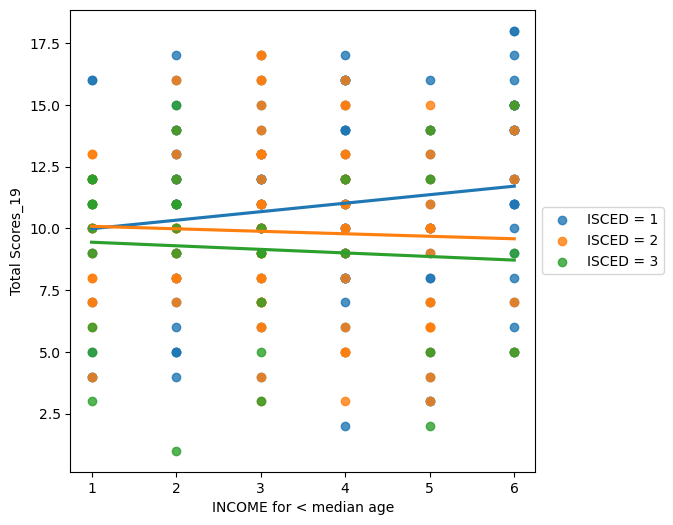

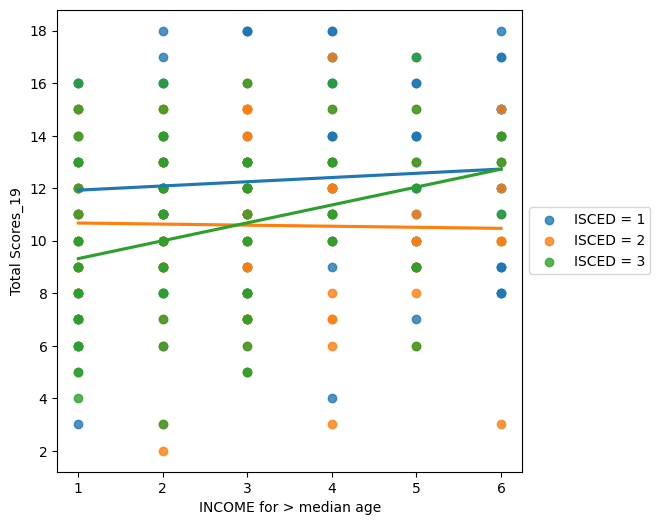

In [114]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='INCOME for > median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

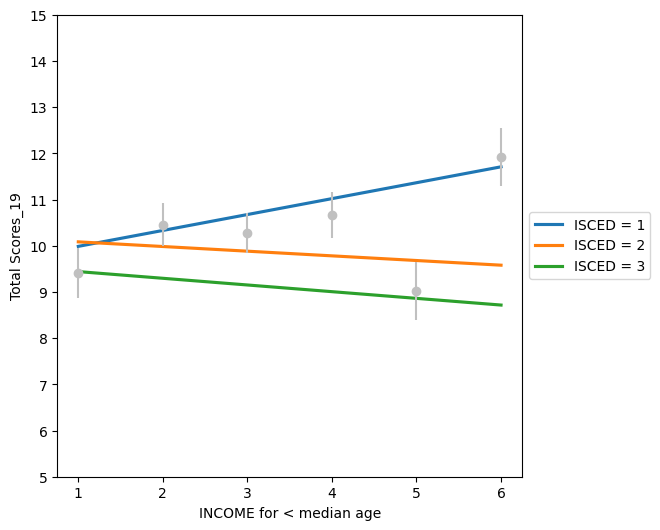

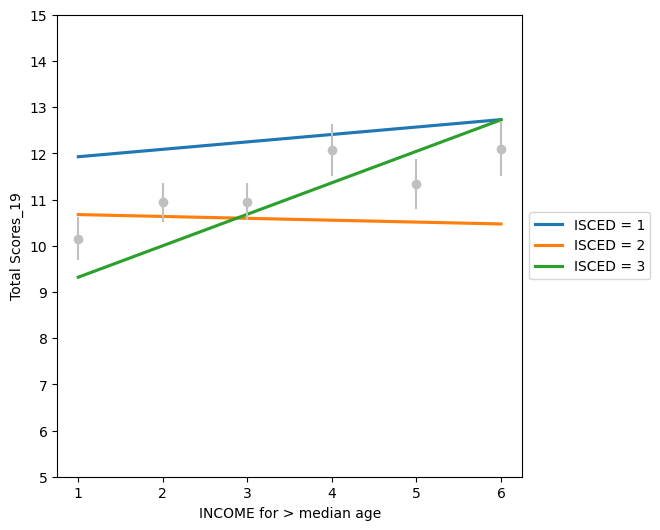

In [115]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['Q12. Income']).mean()['Total Score_19'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['Q12. Income']).sem()['Total Score_19'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Total Score_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['Q12. Income']).mean()['Total Score_19'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['Q12. Income']).sem()['Total Score_19'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Total Scores_19', xlabel='INCOME for > median age',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

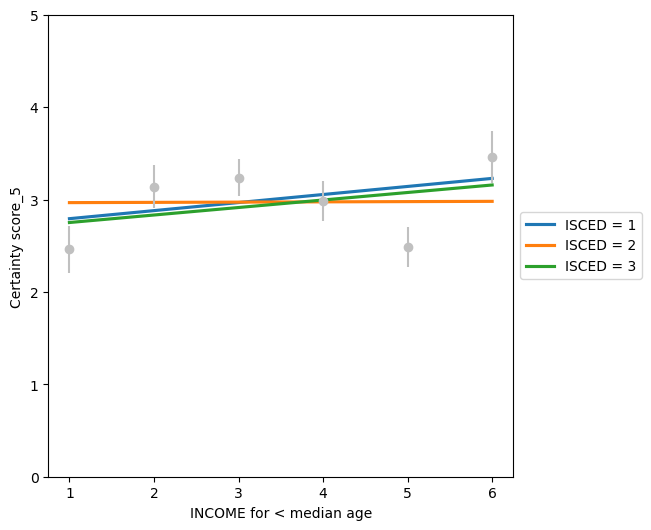

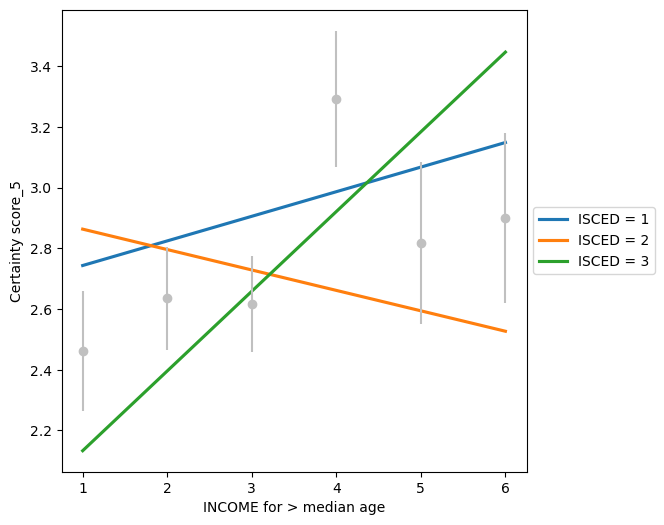

In [116]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['Q12. Income']).mean()['Certainty score_5'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['Q12. Income']).sem()['Certainty score_5'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Certainty score_5', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Certainty score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['Q12. Income']).mean()['Certainty score_5'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['Q12. Income']).sem()['Certainty score_5'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Certainty score_5', xlabel='INCOME for > median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

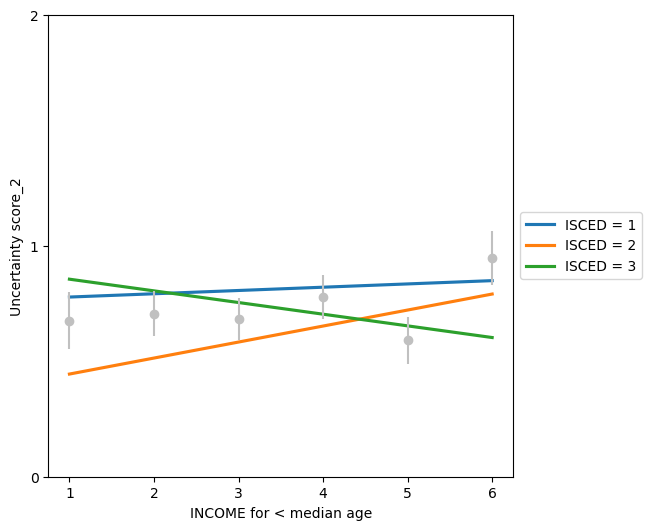

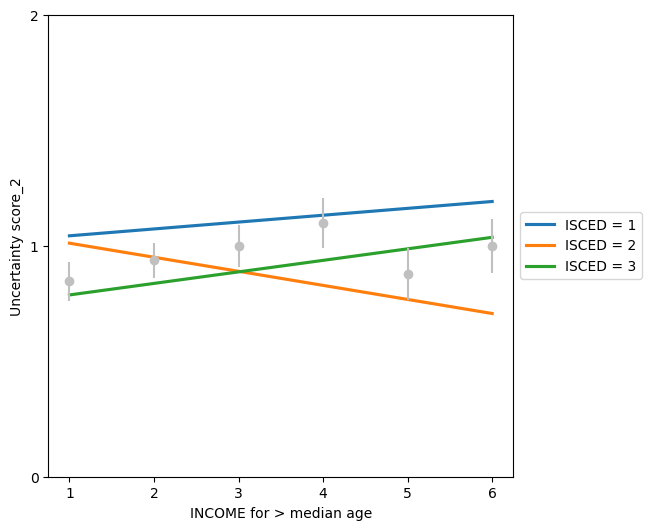

In [117]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['Q12. Income']).mean()['Uncertainty score_2'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['Q12. Income']).sem()['Uncertainty score_2'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Uncertainty score_2', xlabel='INCOME for < median age',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Uncertainty score_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['Q12. Income']).mean()['Uncertainty score_2'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['Q12. Income']).sem()['Uncertainty score_2'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Uncertainty score_2', xlabel='INCOME for > median age',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

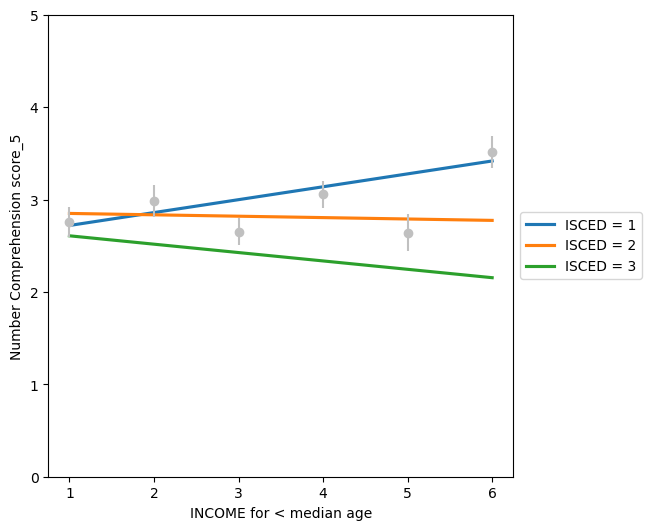

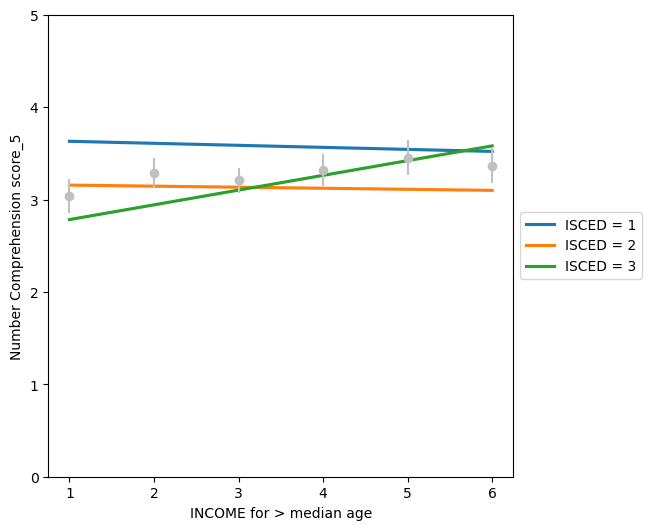

In [118]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['Q12. Income']).mean()['Number Comprehension score_5'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['Q12. Income']).sem()['Number Comprehension score_5'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Number Comprehension score_5', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Number Comprehension score_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['Q12. Income']).mean()['Number Comprehension score_5'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['Q12. Income']).sem()['Number Comprehension score_5'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Number Comprehension score_5', xlabel='INCOME for > median age',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

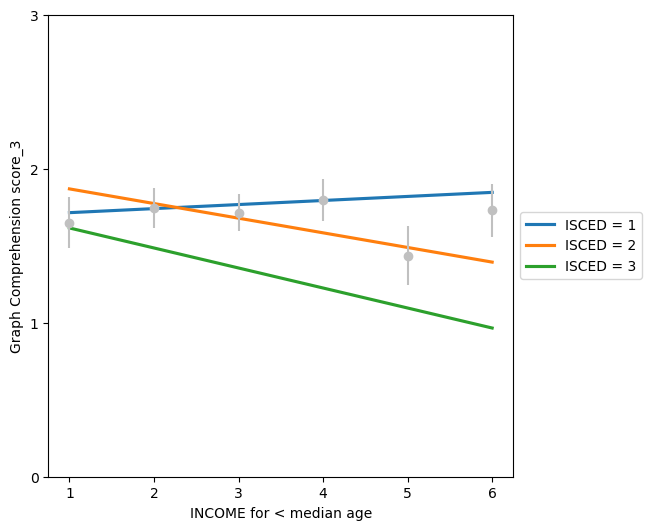

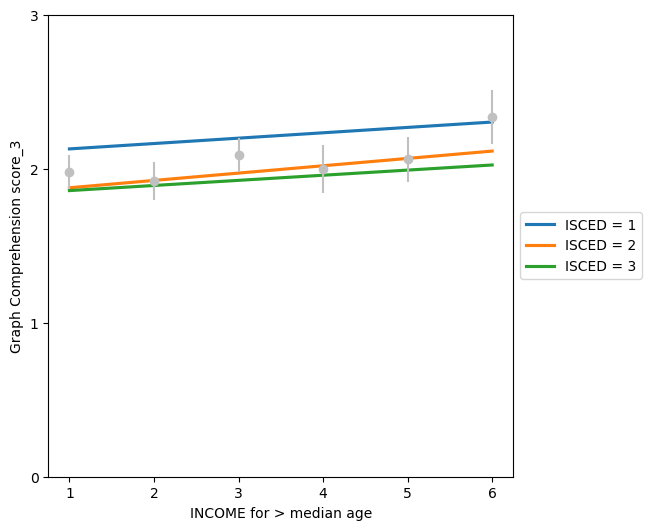

In [119]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['Q12. Income']).mean()['Graph Comprehension score_3'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['Q12. Income']).sem()['Graph Comprehension score_3'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Graph Comprehension score_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Graph Comprehension score_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['Q12. Income']).mean()['Graph Comprehension score_3'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['Q12. Income']).sem()['Graph Comprehension score_3'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Graph Comprehension score_3', xlabel='INCOME for > median age',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

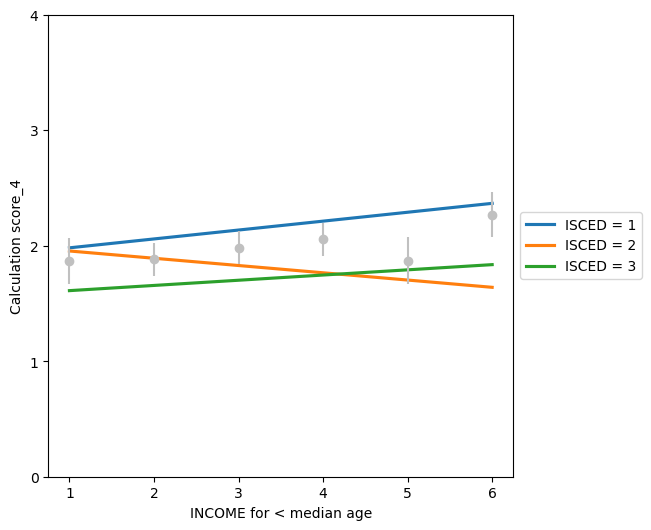

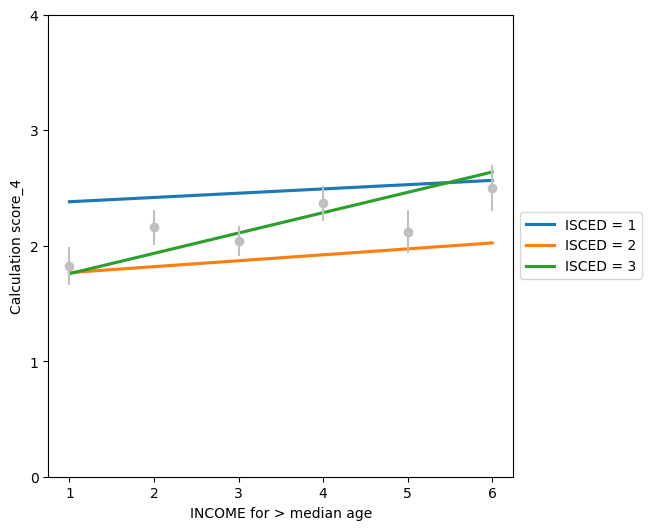

In [120]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['Q12. Income']).mean()['Calculation score_4'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['Q12. Income']).sem()['Calculation score_4'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Calculation score_4', xlabel='INCOME for < median age',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'Q12. Income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Calculation score_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['Q12. Income']).mean()['Calculation score_4'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['Q12. Income']).sem()['Calculation score_4'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Calculation score_4', xlabel='INCOME for > median age',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()